<a href="https://colab.research.google.com/github/MostafaAshrafElshemy/Data_Analysis_Projects/blob/main/Personal_Key_Indicators_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personal Key Indicators of Heart Disease/heart_2020_cleaned.csv', encoding='utf-8')
data.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
data.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [5]:
data.describe().T

count       mean       std    min    25%    50%    75%  \
BMI             319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
PhysicalHealth  319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth    319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
SleepTime       319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   

                  max  
BMI             94.85  
PhysicalHealth  30.00  
MentalHealth    30.00  
SleepTime       24.00

In [6]:
pd.DataFrame(data.columns,columns=['Columns'])

Columns
0       HeartDisease
1                BMI
2            Smoking
3    AlcoholDrinking
4             Stroke
5     PhysicalHealth
6       MentalHealth
7        DiffWalking
8                Sex
9        AgeCategory
10              Race
11          Diabetic
12  PhysicalActivity
13         GenHealth
14         SleepTime
15            Asthma
16     KidneyDisease
17        SkinCancer

In [7]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
data_=pd.DataFrame(data.isna().sum(),columns=['Number Of Null'])
data_['Percentage']=data_['Number Of Null']/data.shape[0]*100
data_

Number Of Null  Percentage
HeartDisease                   0         0.0
BMI                            0         0.0
Smoking                        0         0.0
AlcoholDrinking                0         0.0
Stroke                         0         0.0
PhysicalHealth                 0         0.0
MentalHealth                   0         0.0
DiffWalking                    0         0.0
Sex                            0         0.0
AgeCategory                    0         0.0
Race                           0         0.0
Diabetic                       0         0.0
PhysicalActivity               0         0.0
GenHealth                      0         0.0
SleepTime                      0         0.0
Asthma                         0         0.0
KidneyDisease                  0         0.0
SkinCancer                     0         0.0

In [9]:
data[data.duplicated()]

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
2182             No  19.85      No              No     No             0.0   
3182             No  28.19      No              No     No             0.0   
3397             No  26.54      No              No     No             0.0   
3650             No  32.89     Yes              No     No             2.0   
4061             No  25.84      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
319671           No  25.06      No              No     No             0.0   
319689           No  27.44      No              No     No             0.0   
319726           No  30.41      No              No     No             0.0   
319751           No  34.96      No              No     No             0.0   
319776           No  27.98      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
2182             0.0          No  Female  80 or older     White       No   
3182             0.0          No  Female        50-54     White       No   
3397             0.0          No    Male        45-49     White       No   
3650             1.0          No  Female        50-54     White       No   
4061             0.0          No  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319671           0.0          No    Male        40-44  Hispanic       No   
319689           0.0          No  Female        30-34  Hispanic       No   
319726           0.0          No    Male        18-24  Hispanic       No   
319751           0.0          No    Male        18-24  Hispanic       No   
319776           0.0          No  Female        50-54  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
2182                Yes  Excellent        7.0     No            No         No  
3182                Yes  Excellent        7.0     No            No         No  
3397                Yes  Excellent        6.0     No            No         No  
3650                Yes       Good        9.0     No            No         No  
4061                Yes  Excellent        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319671              Yes  Excellent        7.0     No            No         No  
319689              Yes  Very good        6.0     No            No         No  
319726              Yes  Excellent        7.0     No            No         No  
319751              Yes  Excellent        6.0     No            No         No  
319776               No       Good        8.0     No            No         No  

[18078 rows x 18 columns]

In [10]:
#HeartDisease
value,index=data['HeartDisease'].value_counts().values,data['HeartDisease'].value_counts().index
print("Heartdisease Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

Heartdisease Column's Count Values : 


Count
No   292422
Yes   27373

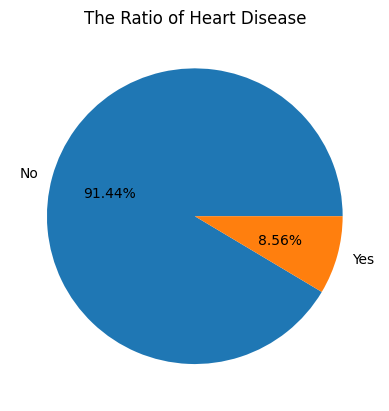

In [11]:
plt.title('The Ratio of Heart Disease')
plt.pie(data['HeartDisease'].value_counts(),autopct='%1.2f%%',labels=data['HeartDisease'].value_counts().index)
plt.show()

In [12]:
#BMI Body Mass Index (BMI)
value,index=data['BMI'].value_counts().values,data['BMI'].value_counts().index
print("BMI Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

BMI Column's Count Values : 


Count
26.63   3762
27.46   2767
27.44   2723
24.41   2696
27.12   2525
...      ...
59.85      1
50.59      1
92.53      1
62.95      1
46.56      1

[3604 rows x 1 columns]

In [13]:
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremly Obese']
data['SegmentBMI'] = pd.cut(data['BMI'], bins, labels=names)
data.drop('BMI',axis=1,inplace=True)
data.head()

HeartDisease Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
0           No     Yes              No     No             3.0          30.0   
1           No      No              No    Yes             0.0           0.0   
2           No     Yes              No     No            20.0          30.0   
3           No      No              No     No             0.0           0.0   
4           No      No              No     No            28.0           0.0   

  DiffWalking     Sex  AgeCategory   Race Diabetic PhysicalActivity  \
0          No  Female        55-59  White      Yes              Yes   
1          No  Female  80 or older  White       No              Yes   
2          No    Male        65-69  White      Yes              Yes   
3          No  Female        75-79  White       No               No   
4         Yes  Female        40-44  White       No              Yes   

   GenHealth  SleepTime Asthma KidneyDisease SkinCancer     SegmentBMI  
0  Very good        5.0    Yes            No        Yes    Underweight  
1  Very good        7.0     No            No         No  Normal weight  
2       Fair        8.0    Yes            No         No     Overweight  
3       Good        6.0     No            No        Yes  Normal weight  
4  Very good        8.0     No            No         No  Normal weight

In [16]:
value,index=data['SegmentBMI'].value_counts().values,data['SegmentBMI'].value_counts().index
print("SegmentBMI Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

SegmentBMI Column's Count Values : 


Count
Overweight      114355
Normal weight    97778
Obese            61169
Extremly Obese   41379
Underweight       5114

In [17]:
value,index=(data.groupby(['HeartDisease'])['SegmentBMI'].count()).values,(data.groupby(['HeartDisease'])['SegmentBMI'].count()).index
print('HeartDisease With Regards SegmentBMI is :\n')
print(pd.DataFrame(value,index,columns=['Count']))

HeartDisease With Regards SegmentBMI is :

               Count
HeartDisease        
No            292422
Yes            27373


In [18]:
value,index=(data.groupby(['HeartDisease','SegmentBMI'])['SegmentBMI'].count()).values,(data.groupby(['HeartDisease','SegmentBMI'])['SegmentBMI'].count()).index
print('-'*40,'\nHeartDisease and SegmentBMI With Regards SegmentBMI is :\n')
pd.DataFrame(value,index,columns=['Count'])

---------------------------------------- 
HeartDisease and SegmentBMI With Regards SegmentBMI is :



Count
HeartDisease SegmentBMI            
No           Underweight       4713
             Normal weight    91439
             Overweight      104360
             Obese            55037
             Extremly Obese   36873
Yes          Underweight        401
             Normal weight     6339
             Overweight        9995
             Obese             6132
             Extremly Obese    4506

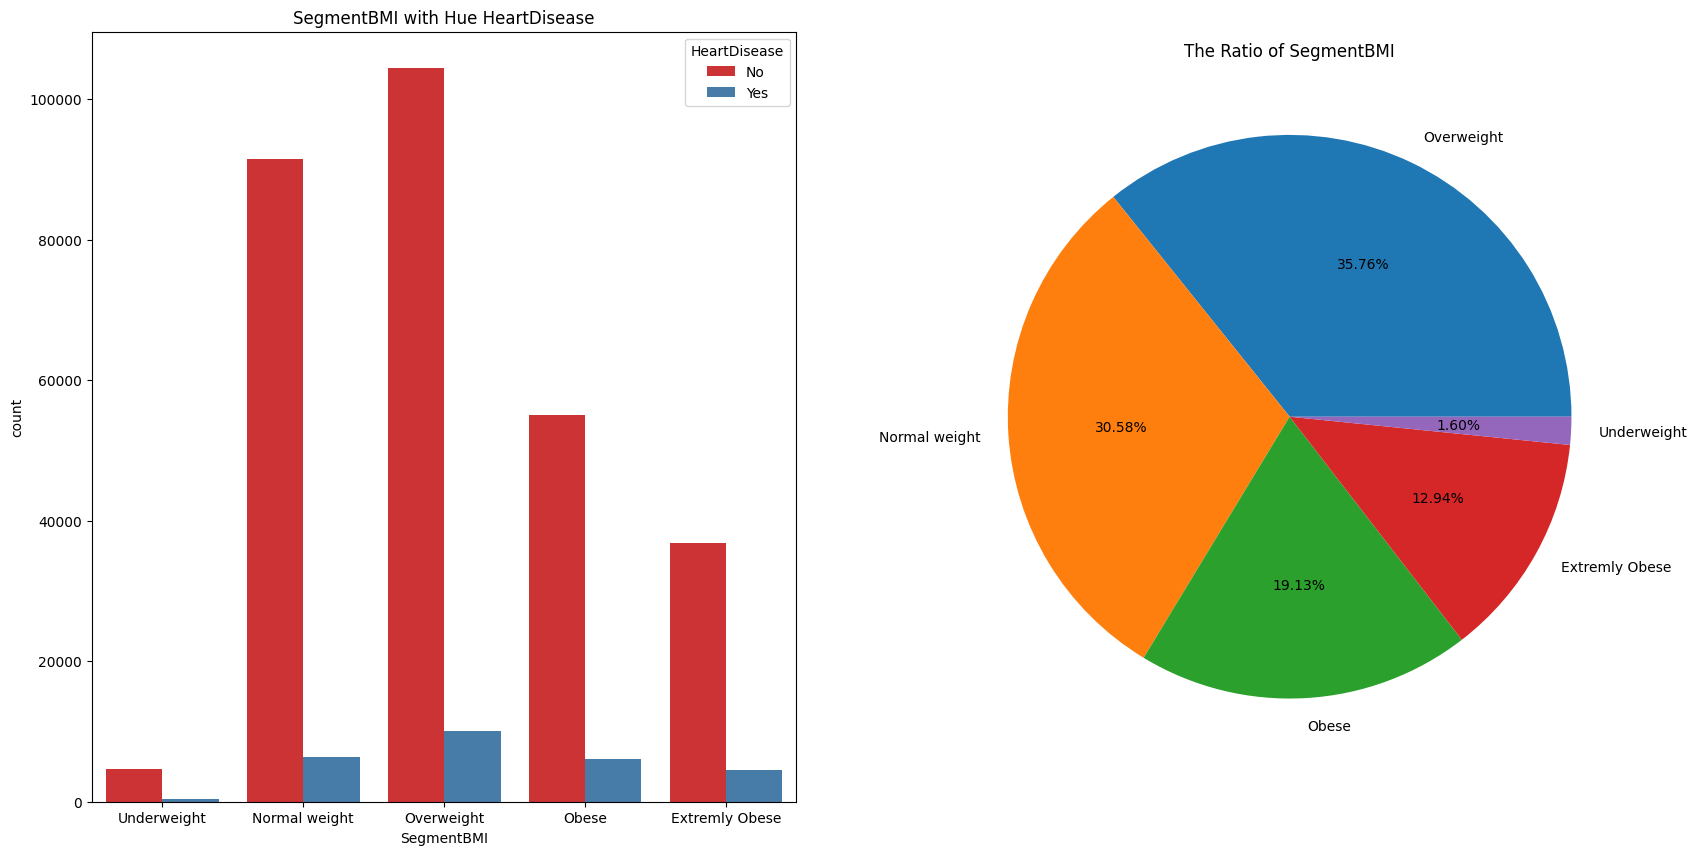

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('SegmentBMI with Hue HeartDisease')
sns.countplot(x='SegmentBMI',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(1,2,2)
plt.title('The Ratio of SegmentBMI')
plt.pie(data['SegmentBMI'].value_counts(),autopct='%1.2f%%',labels=data['SegmentBMI'].value_counts().index)
plt.show()

In [20]:
#Smoking
value,index=data['Smoking'].value_counts().values,data['Smoking'].value_counts().index
print("Smoking Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

Smoking Column's Count Values : 


Count
No   187887
Yes  131908

In [22]:
value,index=(data.groupby(['HeartDisease','Smoking'])['Smoking'].count()).values,(data.groupby(['HeartDisease','Smoking'])['Smoking'].count()).index
print('HeartDisease With Regards Smoking is :\n')
print(pd.DataFrame(value,index,columns=['Count']))


HeartDisease With Regards Smoking is :

                       Count
HeartDisease Smoking        
No           No       176551
             Yes      115871
Yes          No        11336
             Yes       16037


In [23]:
value,index=(data.groupby(['SegmentBMI','Smoking'])['Smoking'].count()).values,(data.groupby(['SegmentBMI','Smoking'])['Smoking'].count()).index
print('-'*40,'\nSegmentBMI With Regards Smoking is :\n')
print(pd.DataFrame(value,index,columns=['Count']))

---------------------------------------- 
SegmentBMI With Regards Smoking is :

                        Count
SegmentBMI     Smoking       
Underweight    No        2810
               Yes       2304
Normal weight  No       59877
               Yes      37901
Overweight     No       66381
               Yes      47974
Obese          No       35136
               Yes      26033
Extremly Obese No       23683
               Yes      17696


In [24]:

value,index=(data.groupby(['HeartDisease','SegmentBMI'])['Smoking'].count()).values,(data.groupby(['HeartDisease','SegmentBMI'])['Smoking'].count()).index
print('-'*40,'\nHeartDisease and SegmentBMI With Regards Smoking is :\n')
pd.DataFrame(value,index,columns=['Count'])

---------------------------------------- 
HeartDisease and SegmentBMI With Regards Smoking is :



Count
HeartDisease SegmentBMI            
No           Underweight       4713
             Normal weight    91439
             Overweight      104360
             Obese            55037
             Extremly Obese   36873
Yes          Underweight        401
             Normal weight     6339
             Overweight        9995
             Obese             6132
             Extremly Obese    4506

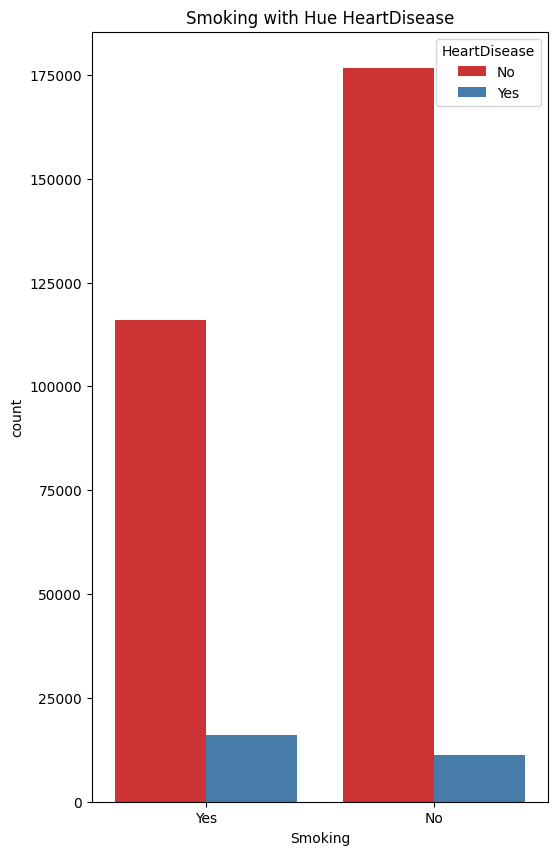

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title('Smoking with Hue HeartDisease')
sns.countplot(x='Smoking',hue='HeartDisease',data=data,palette='Set1')
plt.show()

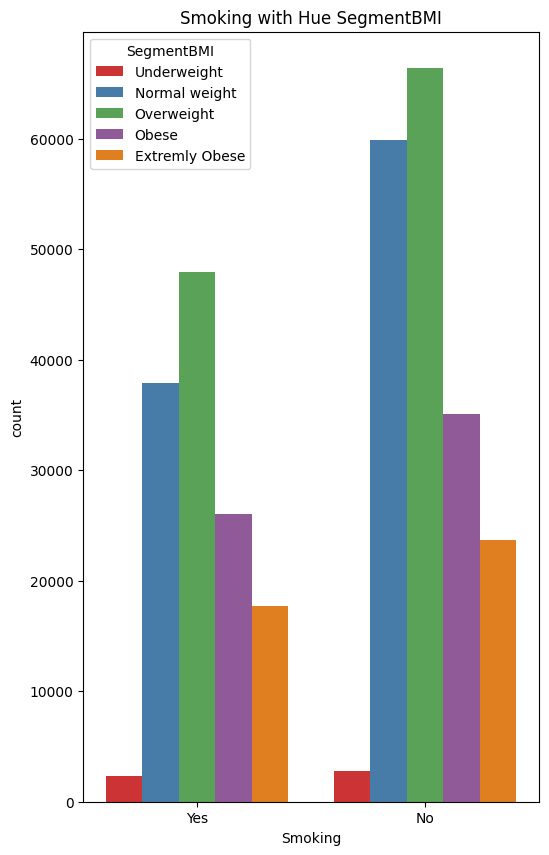

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,2)
plt.title('Smoking with Hue SegmentBMI')
sns.countplot(x='Smoking',hue='SegmentBMI',data=data,palette='Set1')
plt.show()

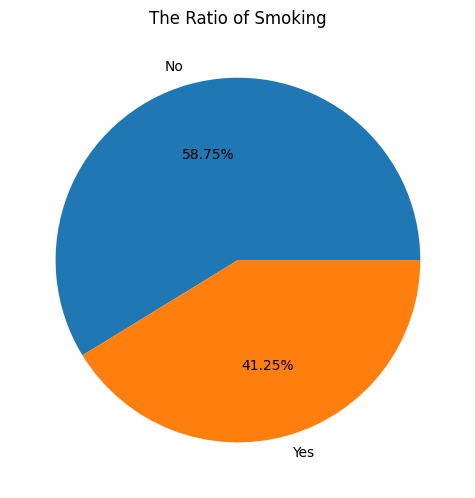

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,3)
plt.title('The Ratio of Smoking')
plt.pie(data['Smoking'].value_counts(),autopct='%1.2f%%',labels=data['Smoking'].value_counts().index)
plt.show()

In [29]:
#AlcoholDrinking Heavy drinkers 
value,index=data['AlcoholDrinking'].value_counts().values,data['AlcoholDrinking'].value_counts().index
print("AlcoholDrinking Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

AlcoholDrinking Column's Count Values : 


Count
No   298018
Yes   21777

In [30]:
value,index=(data.groupby(['HeartDisease','AlcoholDrinking'])['AlcoholDrinking'].count()).values,(data.groupby(['HeartDisease','AlcoholDrinking'])['AlcoholDrinking'].count()).index
print('HeartDisease With Regards AlcoholDrinking is :\n')
print(pd.DataFrame(value,index,columns=['Count']))

HeartDisease With Regards AlcoholDrinking is :

                               Count
HeartDisease AlcoholDrinking        
No           No               271786
             Yes               20636
Yes          No                26232
             Yes                1141


In [31]:
value,index=(data.groupby(['SegmentBMI','AlcoholDrinking'])['AlcoholDrinking'].count()).values,(data.groupby(['SegmentBMI','AlcoholDrinking'])['AlcoholDrinking'].count()).index
print('-'*40,'\nSegmentBMI With Regards AlcoholDrinking is :\n')
print(pd.DataFrame(value,index,columns=['Count']))

---------------------------------------- 
SegmentBMI With Regards AlcoholDrinking is :

                                 Count
SegmentBMI     AlcoholDrinking        
Underweight    No                 4751
               Yes                 363
Normal weight  No                90031
               Yes                7747
Overweight     No               106382
               Yes                7973
Obese          No                57488
               Yes                3681
Extremly Obese No                39366
               Yes                2013


In [32]:
value,index=(data.groupby(['Smoking','AlcoholDrinking'])['AlcoholDrinking'].count()).values,(data.groupby(['Smoking','AlcoholDrinking'])['AlcoholDrinking'].count()).index
print('-'*40,'\nSmoking With Regards AlcoholDrinking is :\n')
print(pd.DataFrame(value,index,columns=['Count']))

---------------------------------------- 
Smoking With Regards AlcoholDrinking is :

                          Count
Smoking AlcoholDrinking        
No      No               179525
        Yes                8362
Yes     No               118493
        Yes               13415


In [33]:
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking'])['AlcoholDrinking'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking'])['AlcoholDrinking'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI and Smoking With Regards AlcoholDrinking is :\n')
pd.DataFrame(value,index,columns=['Count'])

---------------------------------------- 
HeartDisease , SegmentBMI and Smoking With Regards AlcoholDrinking is :



Count
HeartDisease SegmentBMI     Smoking       
No           Underweight    No        2680
                            Yes       2033
             Normal weight  No       57343
                            Yes      34096
             Overweight     No       62192
                            Yes      42168
             Obese          No       32601
                            Yes      22436
             Extremly Obese No       21735
                            Yes      15138
Yes          Underweight    No         130
                            Yes        271
             Normal weight  No        2534
                            Yes       3805
             Overweight     No        4189
                            Yes       5806
             Obese          No        2535
                            Yes       3597
             Extremly Obese No        1948
                            Yes       2558

<Axes: title={'center': 'AlcoholDrinking with Hue HeartDisease'}, xlabel='AlcoholDrinking', ylabel='count'>

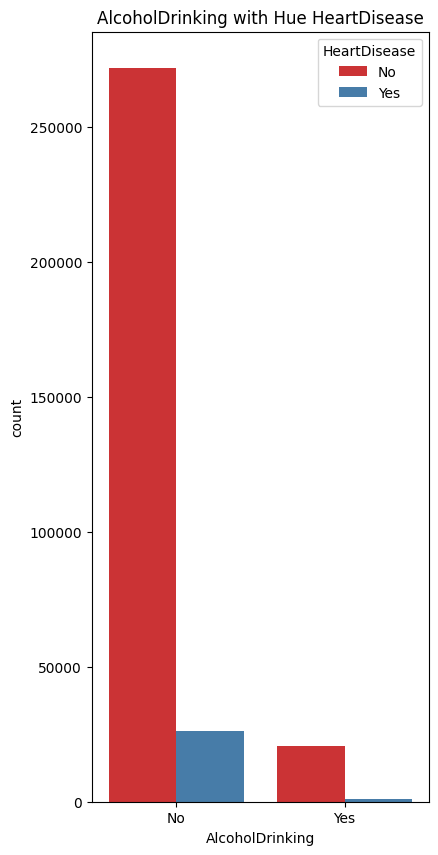

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('AlcoholDrinking with Hue HeartDisease')
sns.countplot(x='AlcoholDrinking',hue='HeartDisease',data=data,palette='Set1')
plt.show()

<Axes: title={'center': 'AlcoholDrinking with Hue SegmentBMI'}, xlabel='AlcoholDrinking', ylabel='count'>

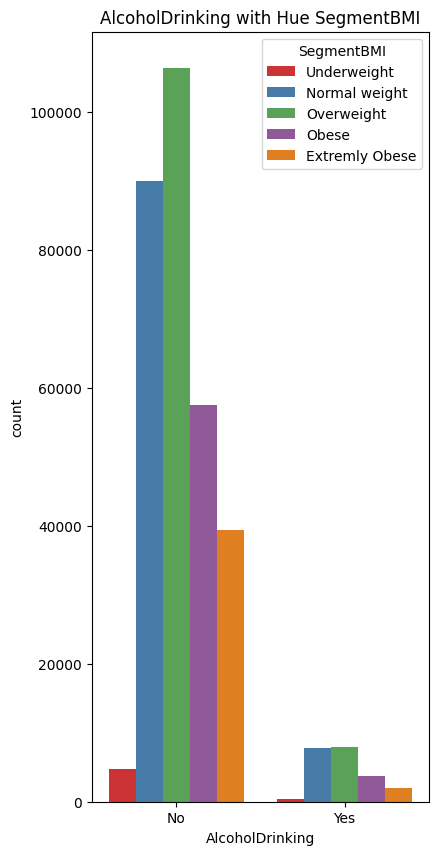

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,2)
plt.title('AlcoholDrinking with Hue SegmentBMI')
sns.countplot(x='AlcoholDrinking',hue='SegmentBMI',data=data,palette='Set1')
plt.show()

<Axes: title={'center': 'AlcoholDrinking with Hue Smoking'}, xlabel='AlcoholDrinking', ylabel='count'>

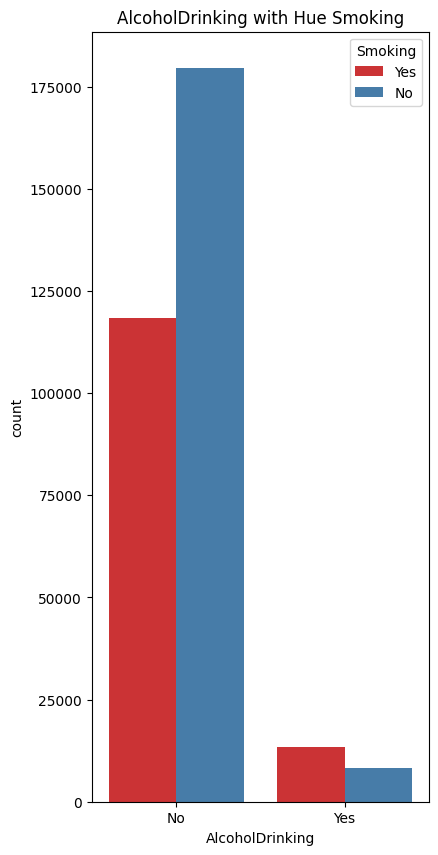

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,3)
plt.title('AlcoholDrinking with Hue Smoking')
sns.countplot(x='AlcoholDrinking',hue='Smoking',data=data,palette='Set1')
plt.show()

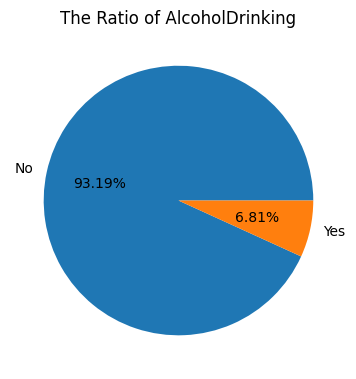

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,4)
plt.title('The Ratio of AlcoholDrinking')
plt.pie(data['AlcoholDrinking'].value_counts(),autopct='%1.2f%%',labels=data['AlcoholDrinking'].value_counts().index)
plt.show()

In [39]:
#Stroke
value,index=data['Stroke'].value_counts().values,data['Stroke'].value_counts().index
print("Stroke Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

Stroke Column's Count Values : 


Count
No   307726
Yes   12069

In [40]:
value,index=(data.groupby(['HeartDisease','Stroke'])['Stroke'].count()).values,(data.groupby(['HeartDisease','Stroke'])['Stroke'].count()).index
print('HeartDisease With Regards Stroke is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','Stroke'])['Stroke'].count()).values,(data.groupby(['SegmentBMI','Stroke'])['Stroke'].count()).index
print('-'*40,'\nSegmentBMI With Regards Stroke is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','Stroke'])['Stroke'].count()).values,(data.groupby(['Smoking','Stroke'])['Stroke'].count()).index
print('-'*40,'\nSmoking With Regards Stroke is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','Stroke'])['Stroke'].count()).values,(data.groupby(['AlcoholDrinking','Stroke'])['Stroke'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards Stroke is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['Stroke'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['Stroke'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking and AlcoholDrinking With Regards Strok is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards Stroke is :

                      Count
HeartDisease Stroke        
No           No      284742
             Yes       7680
Yes          No       22984
             Yes       4389
---------------------------------------- 
SegmentBMI With Regards Stroke is :

                        Count
SegmentBMI     Stroke        
Underweight    No        4859
               Yes        255
Normal weight  No       94673
               Yes       3105
Overweight     No      110073
               Yes       4282
Obese          No       58572
               Yes       2597
Extremly Obese No       39549
               Yes       1830
---------------------------------------- 
Smoking With Regards Stroke is :

                 Count
Smoking Stroke        
No      No      182633
        Yes       5254
Yes     No      125093
        Yes       6815
---------------------------------------- 
AlcoholDrinking With Regards Stroke is :

                         Count
AlcoholDrinking Stroke   

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

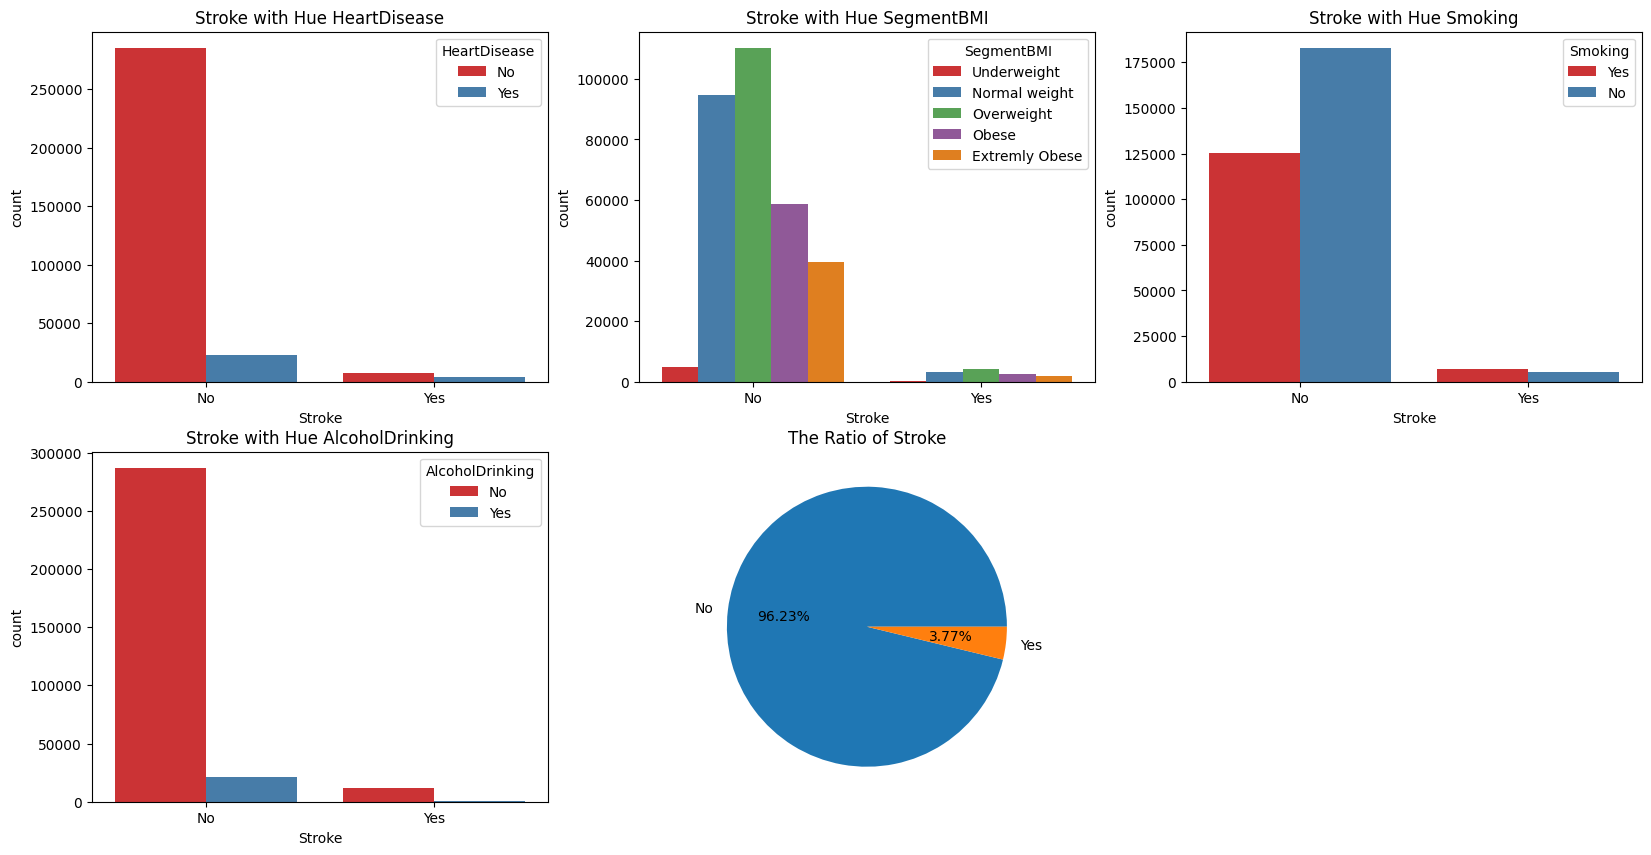

In [41]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title('Stroke with Hue HeartDisease')
sns.countplot(x='Stroke',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(2,3,2)
plt.title('Stroke with Hue SegmentBMI')
sns.countplot(x='Stroke',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(2,3,3)
plt.title('Stroke with Hue Smoking')
sns.countplot(x='Stroke',hue='Smoking',data=data,palette='Set1')
plt.subplot(2,3,4)
plt.title('Stroke with Hue AlcoholDrinking')
sns.countplot(x='Stroke',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(2,3,5)
plt.title('The Ratio of Stroke')
plt.pie(data['Stroke'].value_counts(),autopct='%1.2f%%',labels=data['Stroke'].value_counts().index)
plt.show()

<Axes: title={'center': 'Mental Health'}, xlabel='MentalHealth', ylabel='Count'>

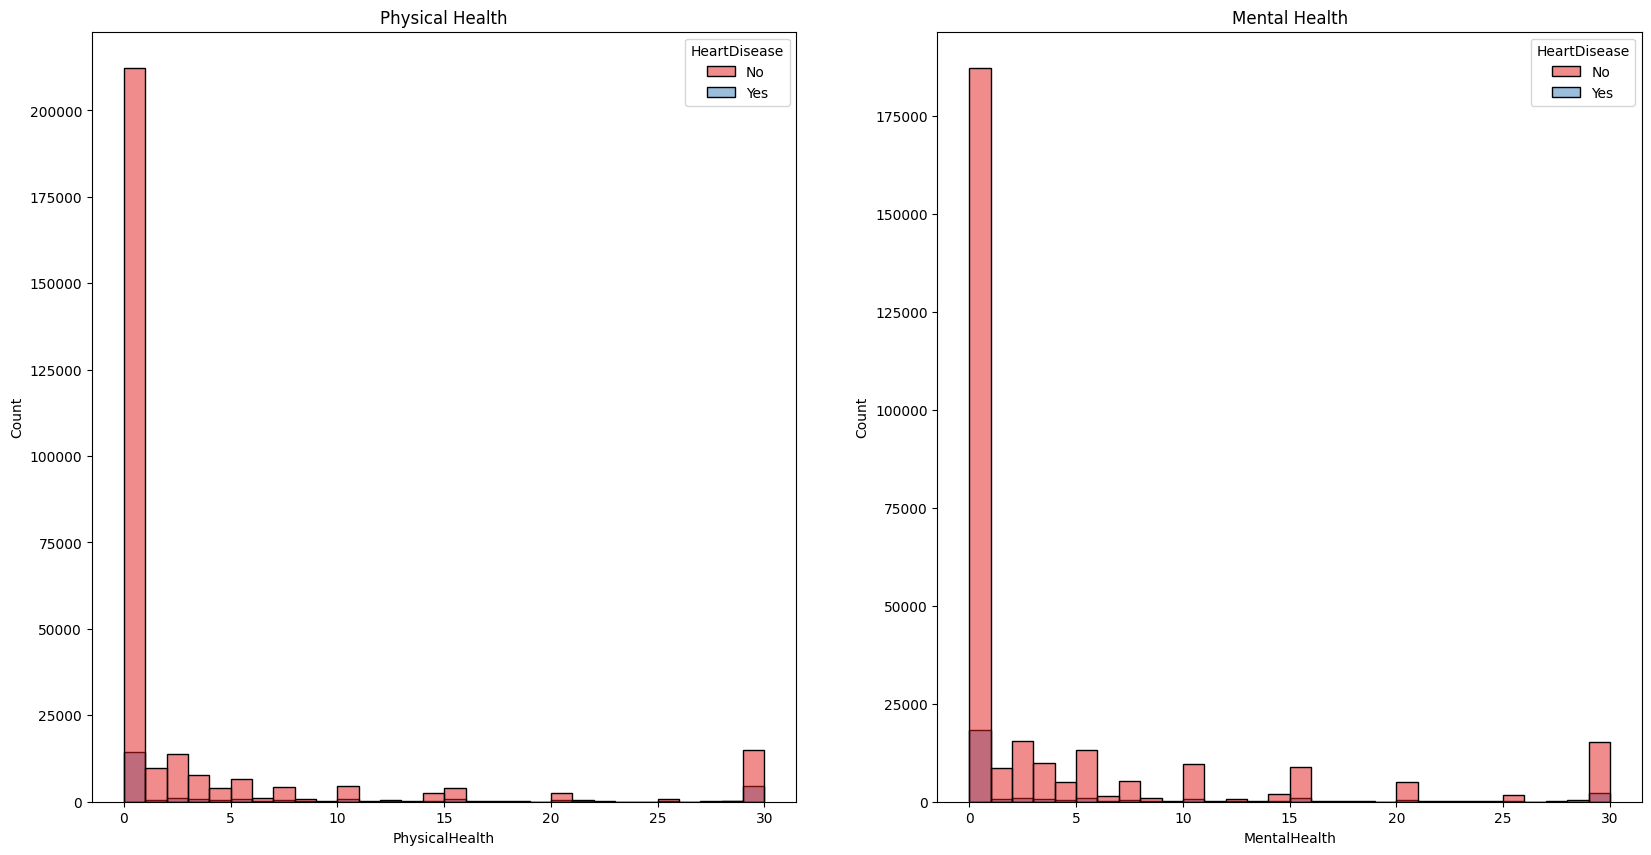

In [42]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
#PhysicalHealth 
plt.title('Physical Health')
sns.histplot(x='PhysicalHealth',hue='HeartDisease',data=data,palette='Set1',bins=np.sort(pd.unique(data['PhysicalHealth'])))
#MentalHealth 
plt.subplot(1,2,2)
plt.title('Mental Health')
sns.histplot(x='MentalHealth',hue='HeartDisease',data=data,palette='Set1',bins=np.sort(pd.unique(data['MentalHealth'])))

In [43]:
#DiffWalking
value,index=data['DiffWalking'].value_counts().values,data['DiffWalking'].value_counts().index
print("DiffWalking Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

DiffWalking Column's Count Values : 


Count
No   275385
Yes   44410

In [44]:
value,index=(data.groupby(['HeartDisease','DiffWalking'])['DiffWalking'].count()).values,(data.groupby(['HeartDisease','DiffWalking'])['DiffWalking'].count()).index
print('HeartDisease With Regards DiffWalking is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','DiffWalking'])['DiffWalking'].count()).values,(data.groupby(['SegmentBMI','DiffWalking'])['DiffWalking'].count()).index
print('-'*40,'\nSegmentBMI With Regards DiffWalking is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','DiffWalking'])['DiffWalking'].count()).values,(data.groupby(['Smoking','DiffWalking'])['DiffWalking'].count()).index
print('-'*40,'\nSmoking With Regards DiffWalking is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','DiffWalking'])['DiffWalking'].count()).values,(data.groupby(['AlcoholDrinking','DiffWalking'])['DiffWalking'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards DiffWalking is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Stroke','DiffWalking'])['DiffWalking'].count()).values,(data.groupby(['Stroke','DiffWalking'])['DiffWalking'].count()).index
print('-'*40,'\nStroke With Regards DiffWalking is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['DiffWalking'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['DiffWalking'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking  and AlcoholDrinking With Regards DiffWalking is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards DiffWalking is :

                           Count
HeartDisease DiffWalking        
No           No           258040
             Yes           34382
Yes          No            17345
             Yes           10028
---------------------------------------- 
SegmentBMI With Regards DiffWalking is :

                             Count
SegmentBMI     DiffWalking        
Underweight    No             4243
               Yes             871
Normal weight  No            89116
               Yes            8662
Overweight     No           101505
               Yes           12850
Obese          No            50803
               Yes           10366
Extremly Obese No            29718
               Yes           11661
---------------------------------------- 
Smoking With Regards DiffWalking is :

                      Count
Smoking DiffWalking        
No      No           168332
        Yes           19555
Yes     No           107053
        Yes           24855
-----

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

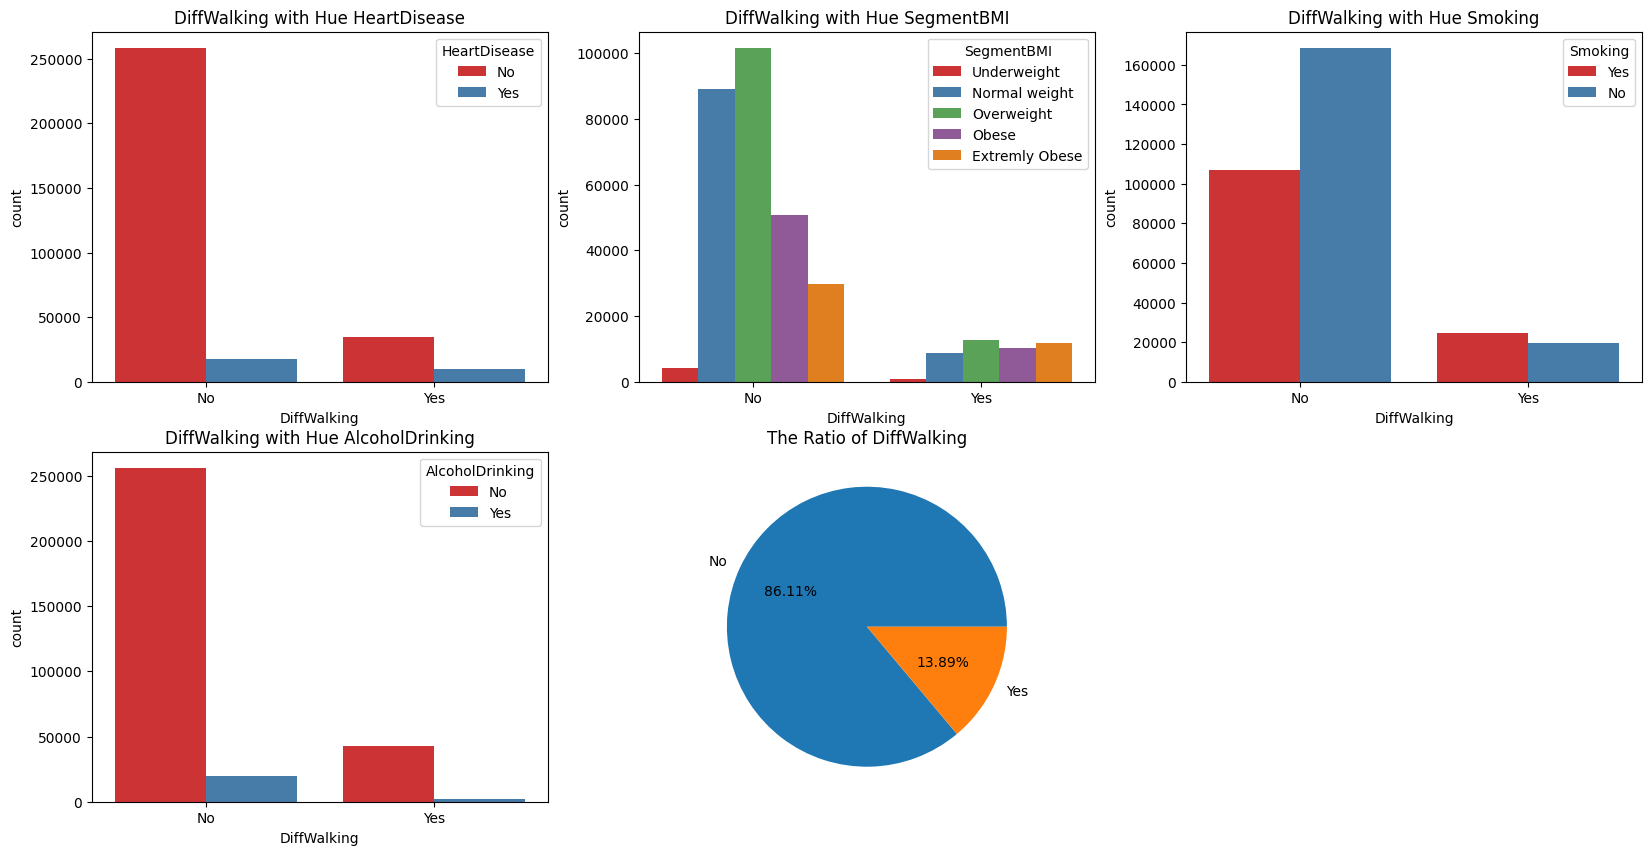

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title('DiffWalking with Hue HeartDisease')
sns.countplot(x='DiffWalking',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(2,3,2)
plt.title('DiffWalking with Hue SegmentBMI')
sns.countplot(x='DiffWalking',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(2,3,3)
plt.title('DiffWalking with Hue Smoking')
sns.countplot(x='DiffWalking',hue='Smoking',data=data,palette='Set1')
plt.subplot(2,3,4)
plt.title('DiffWalking with Hue AlcoholDrinking')
sns.countplot(x='DiffWalking',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(2,3,5)
plt.title('The Ratio of DiffWalking')
plt.pie(data['DiffWalking'].value_counts(),autopct='%1.2f%%',labels=data['DiffWalking'].value_counts().index)
plt.show()

In [46]:
#Sex
value,index=data['Sex'].value_counts().values,data['Sex'].value_counts().index
print("Sex Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

Sex Column's Count Values : 


Count
Female  167805
Male    151990

In [47]:
value,index=(data.groupby(['HeartDisease','Sex'])['Sex'].count()).values,(data.groupby(['HeartDisease','Sex'])['Sex'].count()).index
print('HeartDisease With Regards Sex is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','Sex'])['Sex'].count()).values,(data.groupby(['SegmentBMI','Sex'])['Sex'].count()).index
print('-'*40,'\nSegmentBMI With Regards Sex is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','Sex'])['Sex'].count()).values,(data.groupby(['Smoking','Sex'])['Sex'].count()).index
print('-'*40,'\nSmoking With Regards Sex is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','Sex'])['Sex'].count()).values,(data.groupby(['AlcoholDrinking','Sex'])['Sex'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards Sex is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Stroke','Sex'])['Sex'].count()).values,(data.groupby(['Stroke','Sex'])['Sex'].count()).index
print('-'*40,'\nStroke With Regards Sex is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['DiffWalking','Sex'])['Sex'].count()).values,(data.groupby(['DiffWalking','Sex'])['Sex'].count()).index
print('-'*40,'\nDiffWalking With Regards Sex is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['Sex'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['Sex'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking  and AlcoholDrinking With Regards Sex is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards Sex is :

                      Count
HeartDisease Sex           
No           Female  156571
             Male    135851
Yes          Female   11234
             Male     16139
---------------------------------------- 
SegmentBMI With Regards Sex is :

                       Count
SegmentBMI     Sex          
Underweight    Female   3498
               Male     1616
Normal weight  Female  58978
               Male    38800
Overweight     Female  51502
               Male    62853
Obese          Female  30002
               Male    31167
Extremly Obese Female  23825
               Male    17554
---------------------------------------- 
Smoking With Regards Sex is :

                 Count
Smoking Sex           
No      Female  105276
        Male     82611
Yes     Female   62529
        Male     69379
---------------------------------------- 
AlcoholDrinking With Regards Sex is :

                         Count
AlcoholDrinking Sex           
No              Fe

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

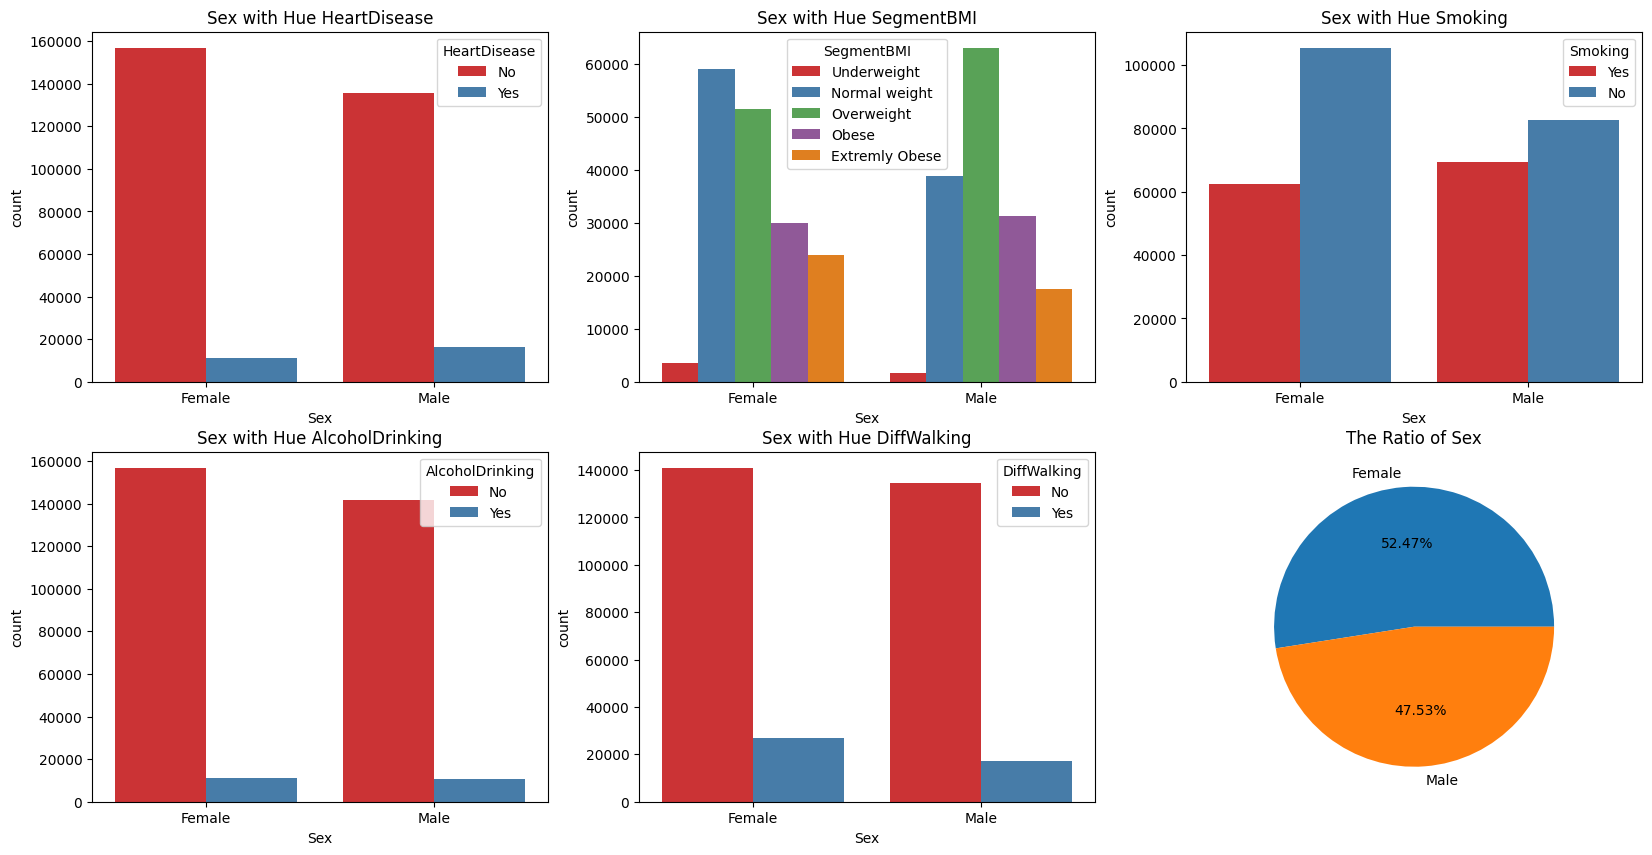

In [48]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title('Sex with Hue HeartDisease')
sns.countplot(x='Sex',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(2,3,2)
plt.title('Sex with Hue SegmentBMI')
sns.countplot(x='Sex',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(2,3,3)
plt.title('Sex with Hue Smoking')
sns.countplot(x='Sex',hue='Smoking',data=data,palette='Set1')
plt.subplot(2,3,4)
plt.title('Sex with Hue AlcoholDrinking')
sns.countplot(x='Sex',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(2,3,5)
plt.title('Sex with Hue DiffWalking')
sns.countplot(x='Sex',hue='DiffWalking',data=data,palette='Set1')
plt.subplot(2,3,6)
plt.title('The Ratio of Sex')
plt.pie(data['Sex'].value_counts(),autopct='%1.2f%%',labels=data['Sex'].value_counts().index)
plt.show()

In [49]:
#AgeCategory
value,index=data['AgeCategory'].value_counts().values,data['AgeCategory'].value_counts().index
print("AgeCategory Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

AgeCategory Column's Count Values : 


Count
65-69        34151
60-64        33686
70-74        31065
55-59        29757
50-54        25382
80 or older  24153
45-49        21791
75-79        21482
18-24        21064
40-44        21006
35-39        20550
30-34        18753
25-29        16955

In [50]:
value,index=(data.groupby(['HeartDisease','AgeCategory'])['AgeCategory'].count()).values,(data.groupby(['HeartDisease','AgeCategory'])['AgeCategory'].count()).index
print('HeartDisease With Regards AgeCategory is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','AgeCategory'])['AgeCategory'].count()).values,(data.groupby(['SegmentBMI','AgeCategory'])['AgeCategory'].count()).index
print('-'*40,'\nSegmentBMI With Regards AgeCategory is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','AgeCategory'])['AgeCategory'].count()).values,(data.groupby(['Smoking','AgeCategory'])['AgeCategory'].count()).index
print('-'*40,'\nSmoking With Regards AgeCategory is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','AgeCategory'])['AgeCategory'].count()).values,(data.groupby(['AlcoholDrinking','AgeCategory'])['AgeCategory'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards AgeCategory is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Stroke','AgeCategory'])['AgeCategory'].count()).values,(data.groupby(['Stroke','AgeCategory'])['AgeCategory'].count()).index
print('-'*40,'\nStroke With Regards AgeCategory is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['DiffWalking','AgeCategory'])['AgeCategory'].count()).values,(data.groupby(['DiffWalking','AgeCategory'])['AgeCategory'].count()).index
print('-'*40,'\nDiffWalking With Regards AgeCategory is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Sex','AgeCategory'])['AgeCategory'].count()).values,(data.groupby(['Sex','AgeCategory'])['AgeCategory'].count()).index
print('-'*40,'\nDiffWalking With Regards AgeCategory is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['AgeCategory'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['AgeCategory'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking  and AlcoholDrinking With Regards AgeCategory is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards AgeCategory is :

                          Count
HeartDisease AgeCategory       
No           18-24        20934
             25-29        16822
             30-34        18527
             35-39        20254
             40-44        20520
             45-49        21047
             50-54        23999
             55-59        27555
             60-64        30359
             65-69        30050
             70-74        26218
             75-79        17433
             80 or older  18704
Yes          18-24          130
             25-29          133
             30-34          226
             35-39          296
             40-44          486
             45-49          744
             50-54         1383
             55-59         2202
             60-64         3327
             65-69         4101
             70-74         4847
             75-79         4049
             80 or older   5449
---------------------------------------- 
SegmentBMI With Re

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

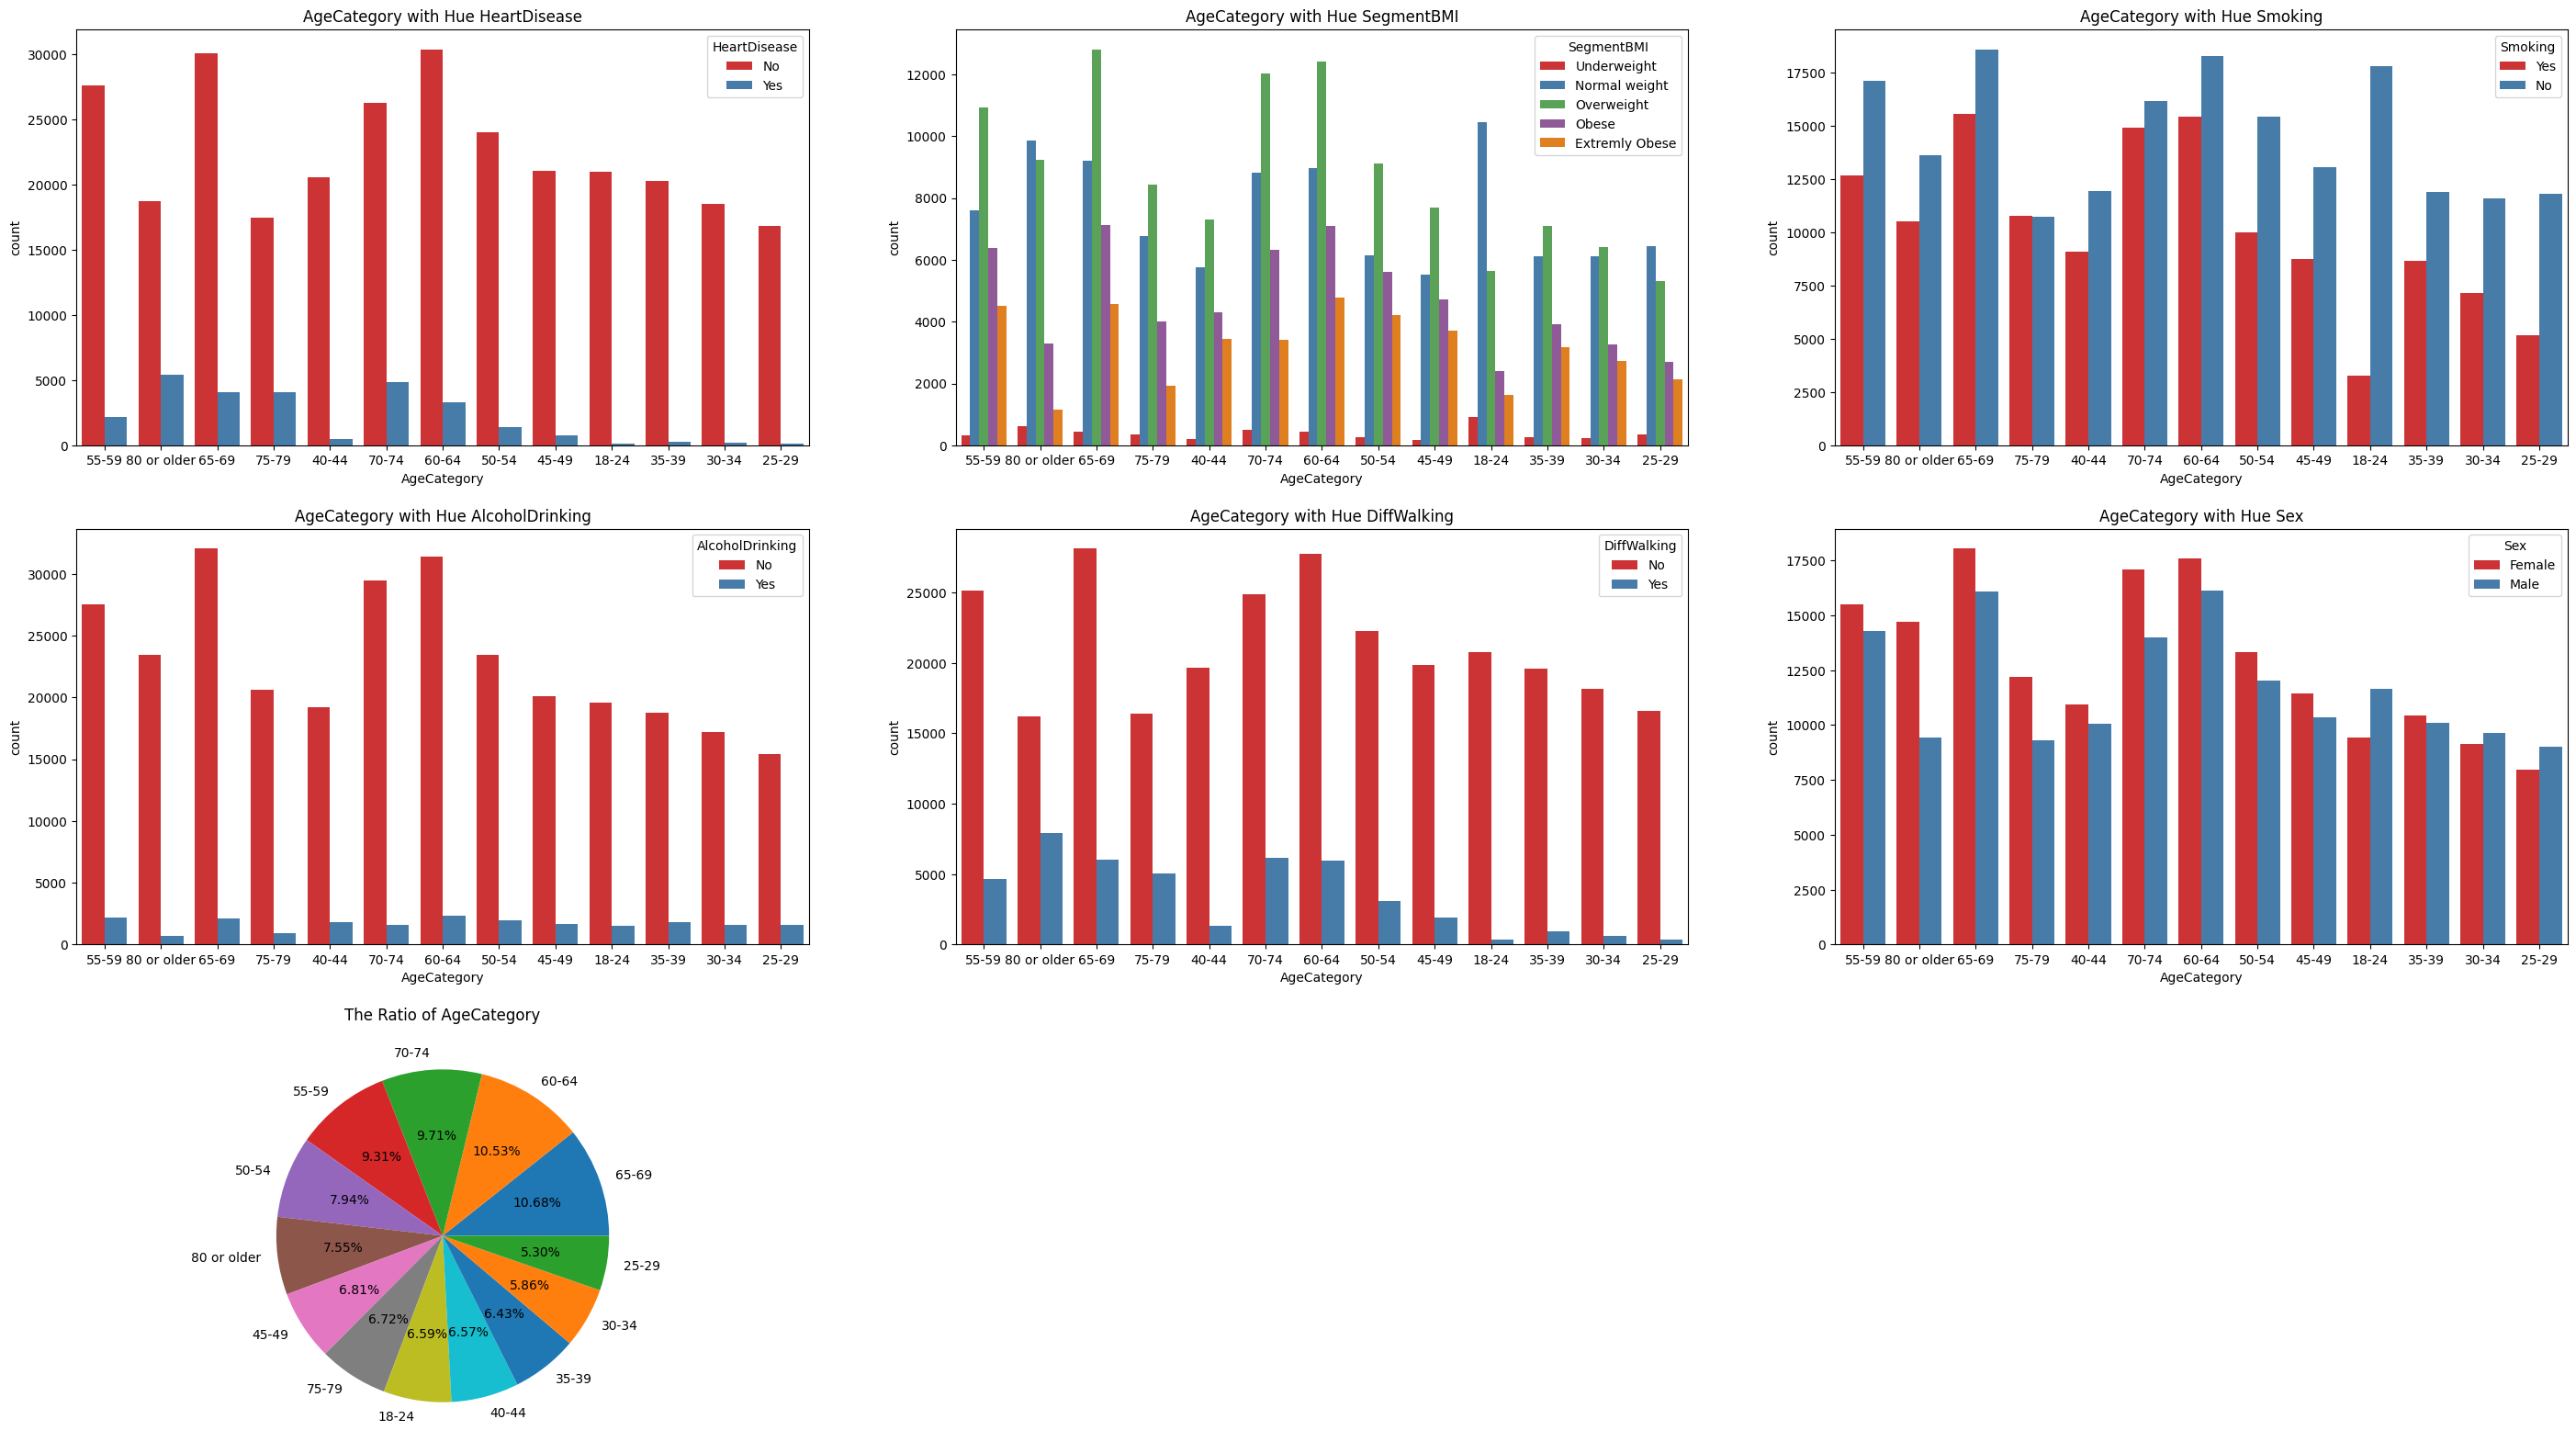

In [51]:
plt.figure(figsize=(35,20))
plt.subplot(3,3,1)
plt.title('AgeCategory with Hue HeartDisease')
sns.countplot(x='AgeCategory',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(3,3,2)
plt.title('AgeCategory with Hue SegmentBMI')
sns.countplot(x='AgeCategory',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(3,3,3)
plt.title('AgeCategory with Hue Smoking')
sns.countplot(x='AgeCategory',hue='Smoking',data=data,palette='Set1')
plt.subplot(3,3,4)
plt.title('AgeCategory with Hue AlcoholDrinking')
sns.countplot(x='AgeCategory',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(3,3,5)
plt.title('AgeCategory with Hue DiffWalking')
sns.countplot(x='AgeCategory',hue='DiffWalking',data=data,palette='Set1')
plt.subplot(3,3,6)
plt.title('AgeCategory with Hue Sex')
sns.countplot(x='AgeCategory',hue='Sex',data=data,palette='Set1')
plt.subplot(3,3,7)
plt.title('The Ratio of AgeCategory')
plt.pie(data['AgeCategory'].value_counts(),autopct='%1.2f%%',labels=data['AgeCategory'].value_counts().index)
plt.show()

In [52]:
#Race
value,index=data['Race'].value_counts().values,data['Race'].value_counts().index
print("Race Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

Race Column's Count Values : 


Count
White                           245212
Hispanic                         27446
Black                            22939
Other                            10928
Asian                             8068
American Indian/Alaskan Native    5202

In [53]:
value,index=(data.groupby(['HeartDisease','Race'])['Race'].count()).values,(data.groupby(['HeartDisease','Race'])['Race'].count()).index
print('HeartDisease With Regards Race is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','Race'])['Race'].count()).values,(data.groupby(['SegmentBMI','Race'])['Race'].count()).index
print('-'*40,'\nSegmentBMI With Regards Race is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','Race'])['Race'].count()).values,(data.groupby(['Smoking','Race'])['Race'].count()).index
print('-'*40,'\nSmoking With Regards Race is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','Race'])['Race'].count()).values,(data.groupby(['AlcoholDrinking','Race'])['Race'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards Race is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Stroke','Race'])['Race'].count()).values,(data.groupby(['Stroke','Race'])['Race'].count()).index
print('-'*40,'\nStroke With Regards Race is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['DiffWalking','Race'])['Race'].count()).values,(data.groupby(['DiffWalking','Race'])['Race'].count()).index
print('-'*40,'\nDiffWalking With Regards Race is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Sex','Race'])['Race'].count()).values,(data.groupby(['Sex','Race'])['Race'].count()).index
print('-'*40,'\nDiffWalking With Regards Race is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AgeCategory','Race'])['Race'].count()).values,(data.groupby(['AgeCategory','Race'])['Race'].count()).index
print('-'*40,'\nAgeCategory With Race is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['Race'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['Race'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking  and AlcoholDrinking With Regards Race is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards Race is :

                                              Count
HeartDisease Race                                  
No           American Indian/Alaskan Native    4660
             Asian                             7802
             Black                            21210
             Hispanic                         26003
             Other                            10042
             White                           222705
Yes          American Indian/Alaskan Native     542
             Asian                              266
             Black                             1729
             Hispanic                          1443
             Other                              886
             White                            22507
---------------------------------------- 
SegmentBMI With Regards Race is :

                                               Count
SegmentBMI     Race                                 
Underweight    American Indian/Alaskan Native     78

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

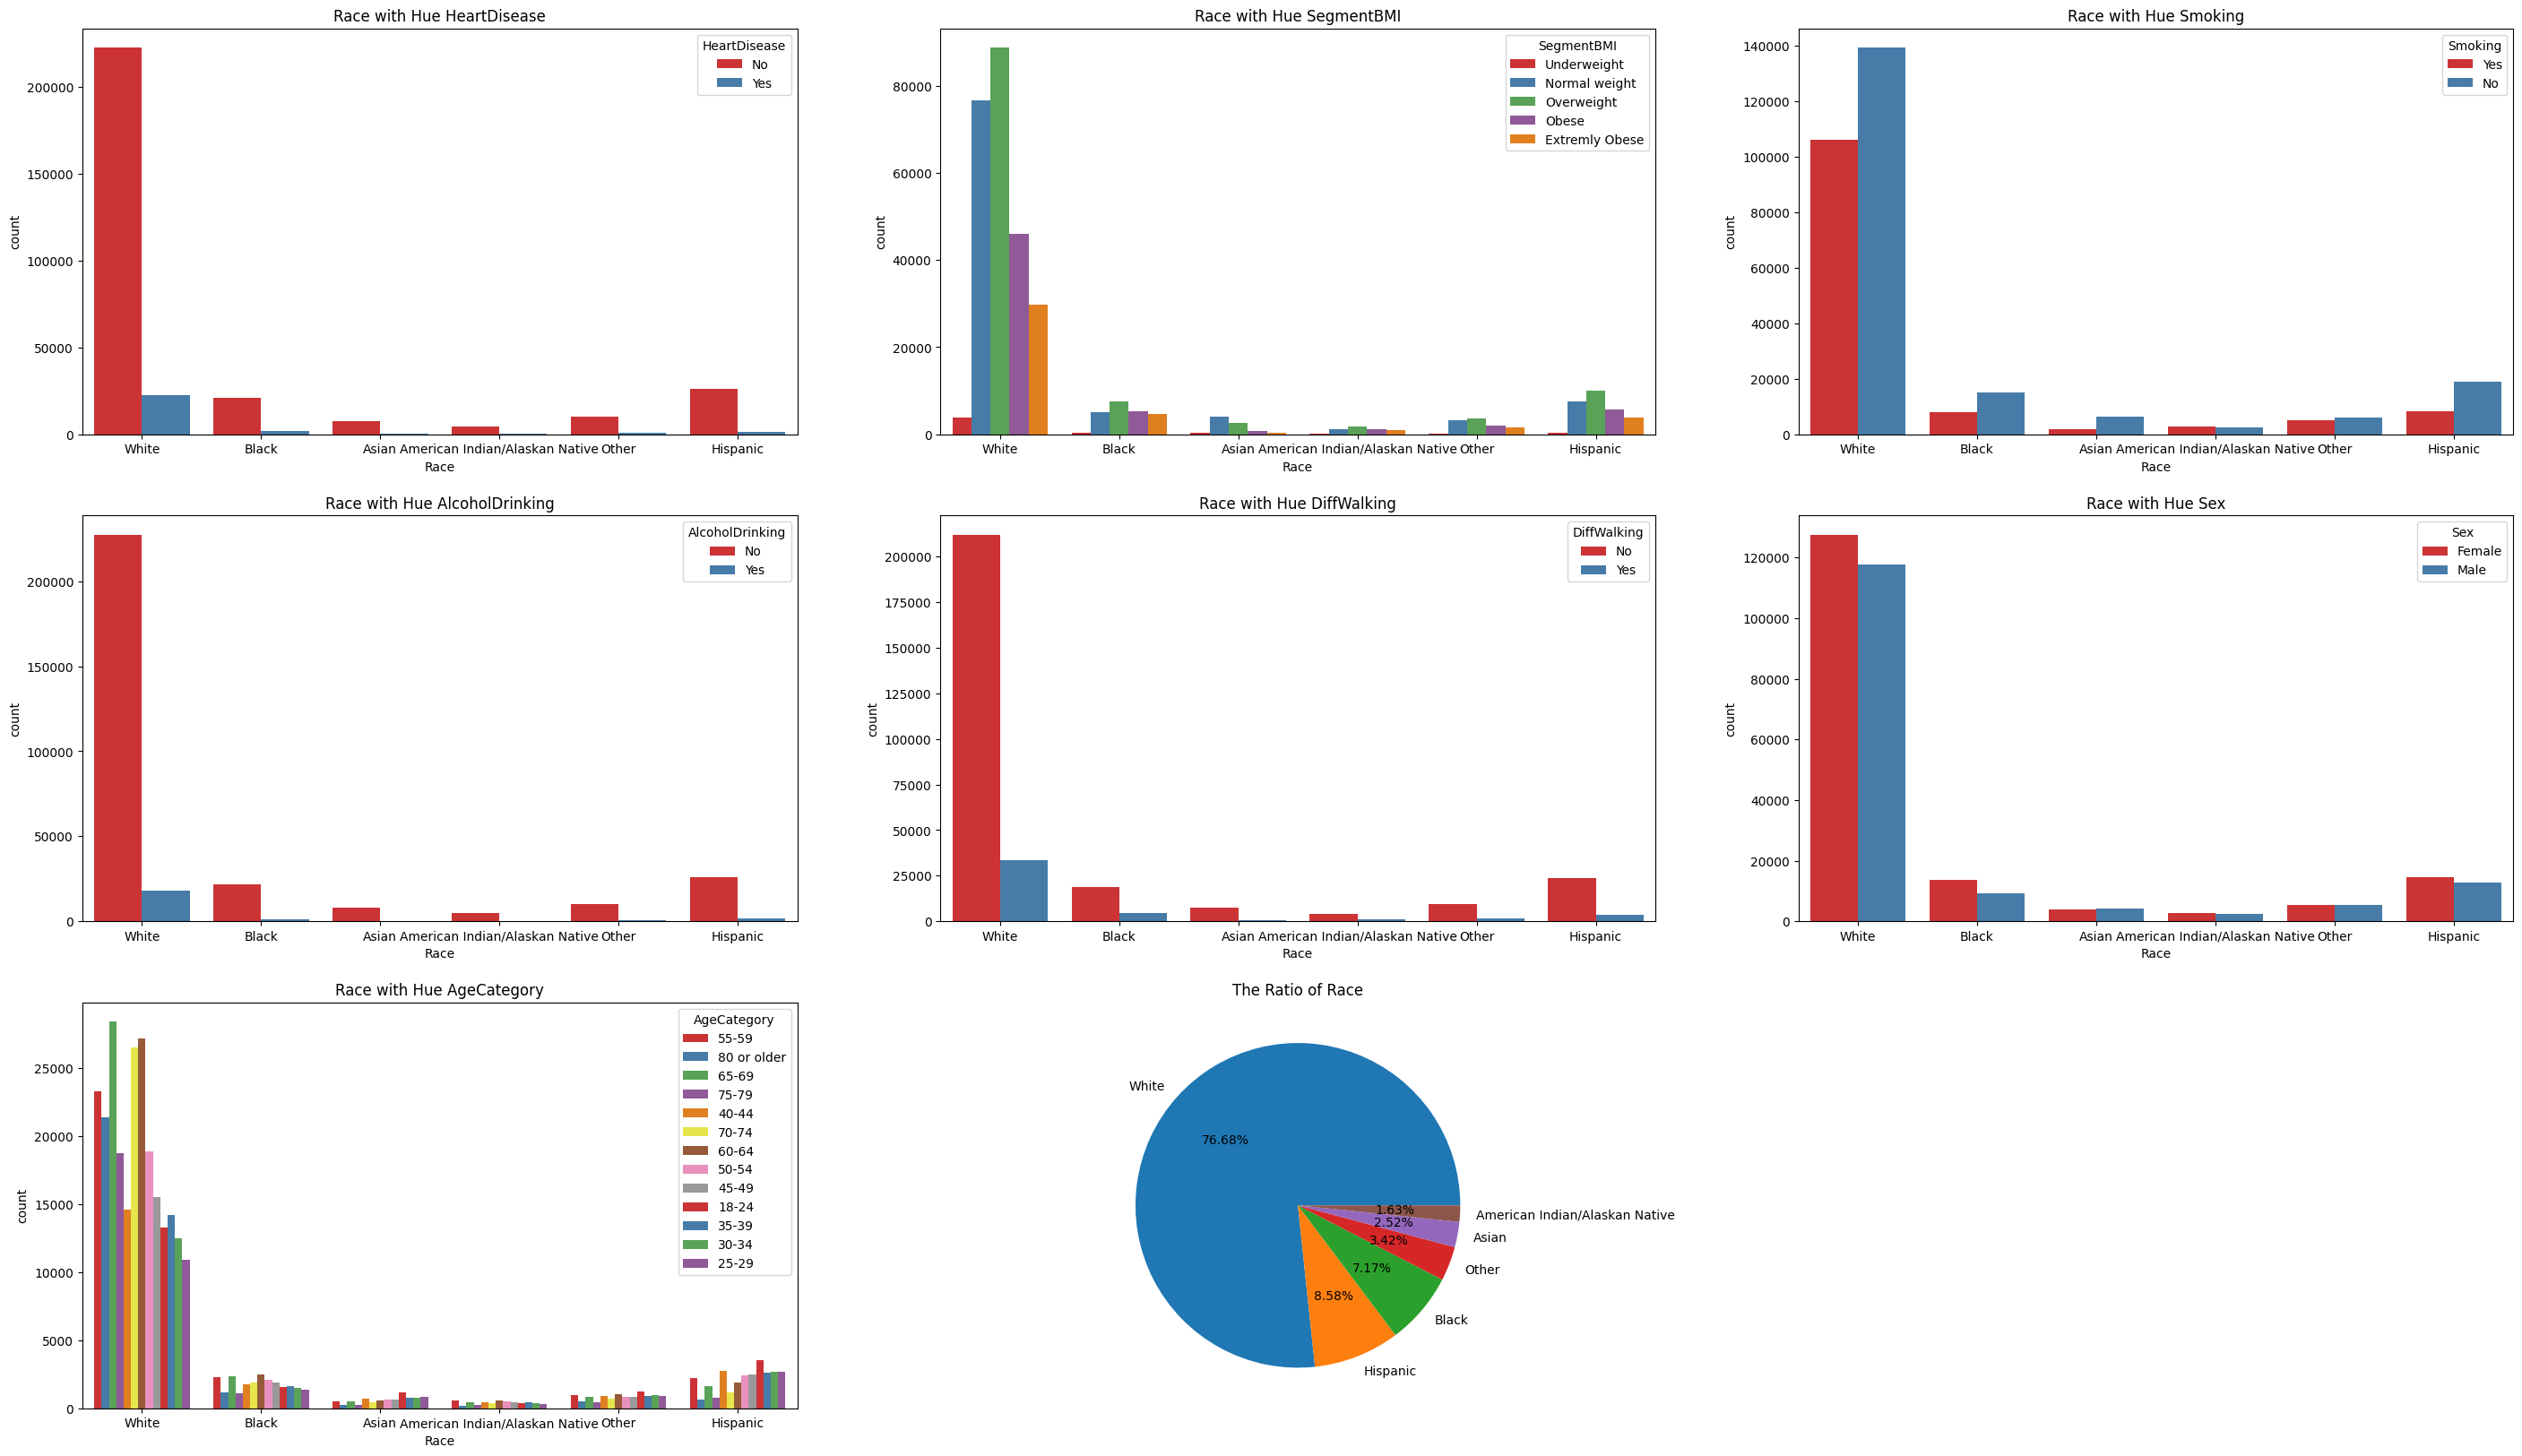

In [54]:
plt.figure(figsize=(35,20))
plt.subplot(3,3,1)
plt.title('Race with Hue HeartDisease')
sns.countplot(x='Race',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(3,3,2)
plt.title('Race with Hue SegmentBMI')
sns.countplot(x='Race',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(3,3,3)
plt.title('Race with Hue Smoking')
sns.countplot(x='Race',hue='Smoking',data=data,palette='Set1')
plt.subplot(3,3,4)
plt.title('Race with Hue AlcoholDrinking')
sns.countplot(x='Race',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(3,3,5)
plt.title('Race with Hue DiffWalking')
sns.countplot(x='Race',hue='DiffWalking',data=data,palette='Set1')
plt.subplot(3,3,6)
plt.title('Race with Hue Sex')
sns.countplot(x='Race',hue='Sex',data=data,palette='Set1')
plt.subplot(3,3,7)
plt.title('Race with Hue AgeCategory')
sns.countplot(x='Race',hue='AgeCategory',data=data,palette='Set1')
plt.subplot(3,3,8)
plt.title('The Ratio of Race')
plt.pie(data['Race'].value_counts(),autopct='%1.2f%%',labels=data['Race'].value_counts().index)
plt.show()

In [55]:
#Diabetic
value,index=data['Diabetic'].value_counts().values,data['Diabetic'].value_counts().index
print("Race Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

Race Column's Count Values : 


Count
No                       269653
Yes                       40802
No, borderline diabetes    6781
Yes (during pregnancy)     2559

In [56]:
value,index=(data.groupby(['HeartDisease','Diabetic'])['Diabetic'].count()).values,(data.groupby(['HeartDisease','Diabetic'])['Diabetic'].count()).index
print('HeartDisease With Regards Diabetic is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','Diabetic'])['Diabetic'].count()).values,(data.groupby(['SegmentBMI','Diabetic'])['Diabetic'].count()).index
print('-'*40,'\nSegmentBMI With Regards Diabetic is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','Diabetic'])['Diabetic'].count()).values,(data.groupby(['Smoking','Diabetic'])['Diabetic'].count()).index
print('-'*40,'\nSmoking With Regards Diabetic is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','Diabetic'])['Diabetic'].count()).values,(data.groupby(['AlcoholDrinking','Diabetic'])['Diabetic'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards Diabetic is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Stroke','Diabetic'])['Diabetic'].count()).values,(data.groupby(['Stroke','Diabetic'])['Diabetic'].count()).index
print('-'*40,'\nStroke With Regards Diabetic is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['DiffWalking','Diabetic'])['Diabetic'].count()).values,(data.groupby(['DiffWalking','Diabetic'])['Diabetic'].count()).index
print('-'*40,'\nDiffWalking With Regards Diabetic is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Sex','Diabetic'])['Diabetic'].count()).values,(data.groupby(['Sex','Diabetic'])['Diabetic'].count()).index
print('-'*40,'\nDiffWalking With Regards Diabetic is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AgeCategory','Diabetic'])['Diabetic'].count()).values,(data.groupby(['AgeCategory','Diabetic'])['Diabetic'].count()).index
print('-'*40,'\nAgeCategory With Diabetic is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Race','Diabetic'])['Diabetic'].count()).values,(data.groupby(['Race','Diabetic'])['Diabetic'].count()).index
print('-'*40,'\nRace With Diabetic is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['Diabetic'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['Diabetic'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking  and AlcoholDrinking With Regards Diabetic is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards Diabetic is :

                                       Count
HeartDisease Diabetic                       
No           No                       252134
             No, borderline diabetes    5992
             Yes                       31845
             Yes (during pregnancy)     2451
Yes          No                        17519
             No, borderline diabetes     789
             Yes                        8957
             Yes (during pregnancy)      108
---------------------------------------- 
SegmentBMI With Regards Diabetic is :

                                        Count
SegmentBMI     Diabetic                      
Underweight    No                        4730
               No, borderline diabetes     79
               Yes                        258
               Yes (during pregnancy)      47
Normal weight  No                       89917
               No, borderline diabetes   1336
               Yes                       5713
              

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

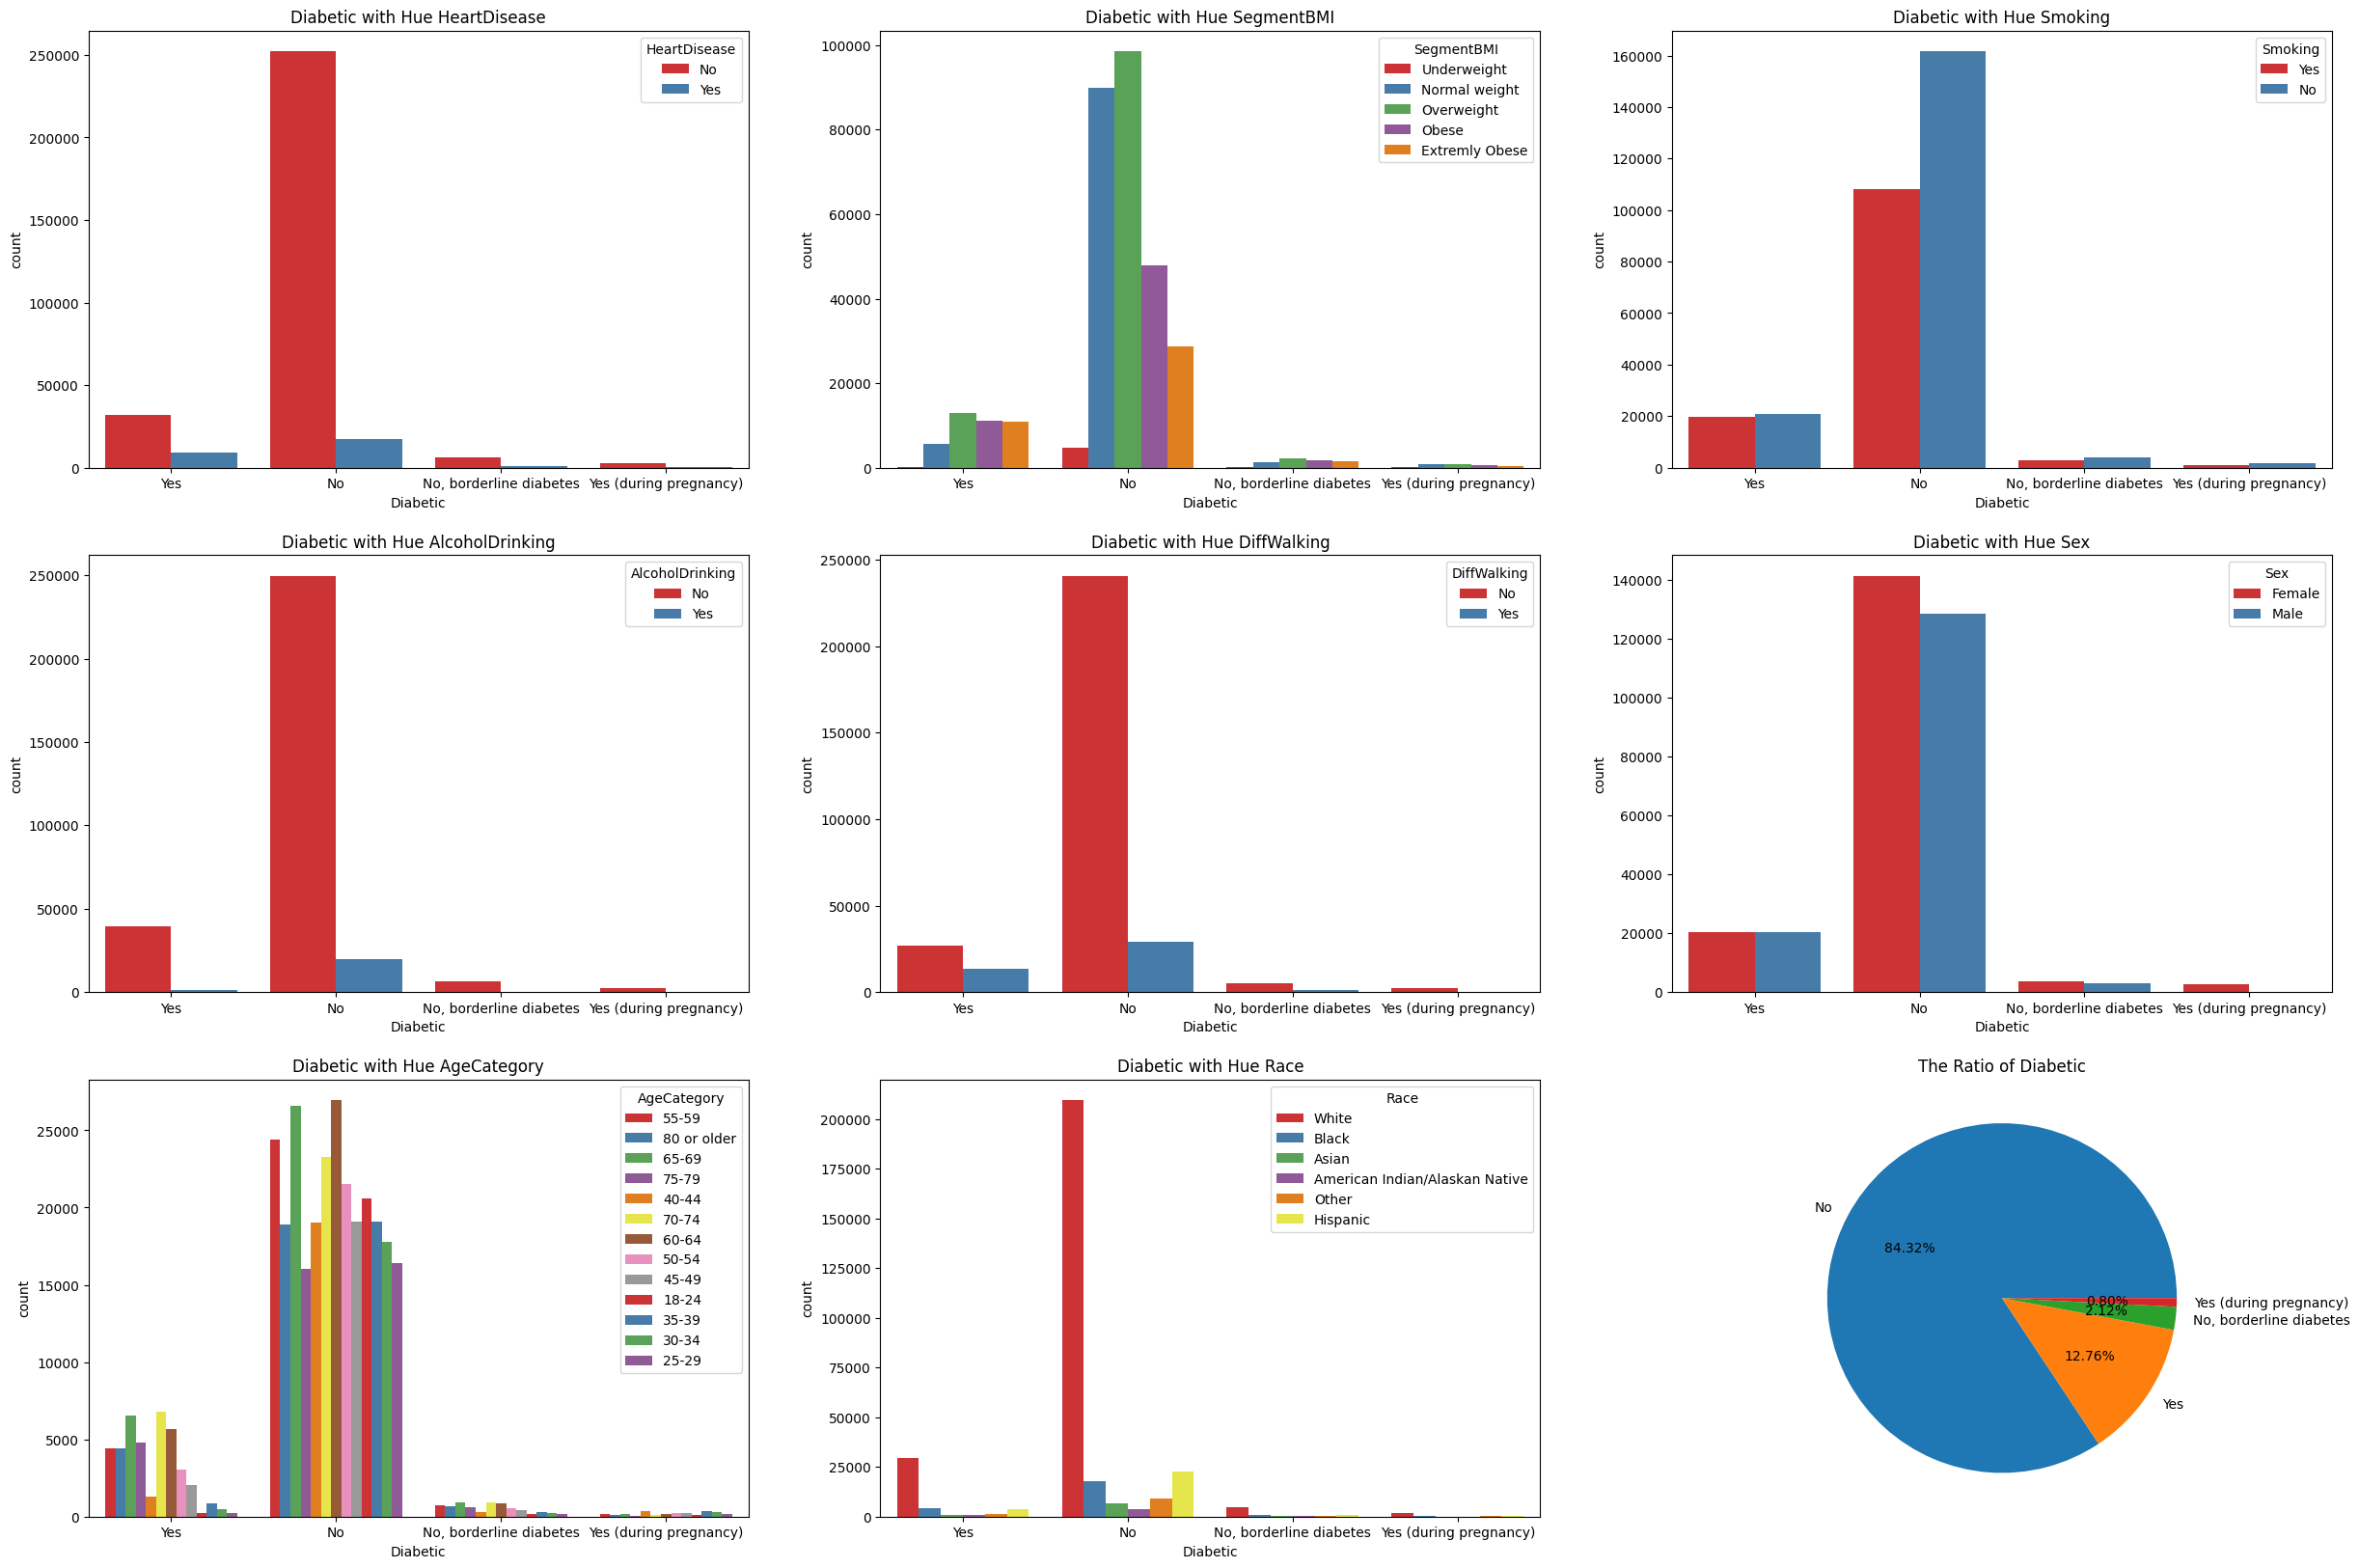

In [57]:
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
plt.title('Diabetic with Hue HeartDisease')
sns.countplot(x='Diabetic',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(3,3,2)
plt.title('Diabetic with Hue SegmentBMI')
sns.countplot(x='Diabetic',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(3,3,3)
plt.title('Diabetic with Hue Smoking')
sns.countplot(x='Diabetic',hue='Smoking',data=data,palette='Set1')
plt.subplot(3,3,4)
plt.title('Diabetic with Hue AlcoholDrinking')
sns.countplot(x='Diabetic',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(3,3,5)
plt.title('Diabetic with Hue DiffWalking')
sns.countplot(x='Diabetic',hue='DiffWalking',data=data,palette='Set1')
plt.subplot(3,3,6)
plt.title('Diabetic with Hue Sex')
sns.countplot(x='Diabetic',hue='Sex',data=data,palette='Set1')
plt.subplot(3,3,7)
plt.title('Diabetic with Hue AgeCategory')
sns.countplot(x='Diabetic',hue='AgeCategory',data=data,palette='Set1')
plt.subplot(3,3,8)
plt.title('Diabetic with Hue Race')
sns.countplot(x='Diabetic',hue='Race',data=data,palette='Set1')
plt.subplot(3,3,9)
plt.title('The Ratio of Diabetic')
plt.pie(data['Diabetic'].value_counts(),autopct='%1.2f%%',labels=data['Diabetic'].value_counts().index)
plt.show()

In [58]:
#PhysicalActivity
value,index=data['PhysicalActivity'].value_counts().values,data['PhysicalActivity'].value_counts().index
print("PhysicalActivity Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

PhysicalActivity Column's Count Values : 


Count
Yes  247957
No    71838

In [59]:
value,index=(data.groupby(['HeartDisease','PhysicalActivity'])['PhysicalActivity'].count()).values,(data.groupby(['HeartDisease','PhysicalActivity'])['PhysicalActivity'].count()).index
print('HeartDisease With Regards PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','PhysicalActivity'])['PhysicalActivity'].count()).values,(data.groupby(['SegmentBMI','PhysicalActivity'])['PhysicalActivity'].count()).index
print('-'*40,'\nSegmentBMI With Regards PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','PhysicalActivity'])['PhysicalActivity'].count()).values,(data.groupby(['Smoking','PhysicalActivity'])['PhysicalActivity'].count()).index
print('-'*40,'\nSmoking With Regards PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','PhysicalActivity'])['PhysicalActivity'].count()).values,(data.groupby(['AlcoholDrinking','PhysicalActivity'])['PhysicalActivity'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Stroke','PhysicalActivity'])['PhysicalActivity'].count()).values,(data.groupby(['Stroke','PhysicalActivity'])['PhysicalActivity'].count()).index
print('-'*40,'\nStroke With Regards PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['DiffWalking','PhysicalActivity'])['PhysicalActivity'].count()).values,(data.groupby(['DiffWalking','PhysicalActivity'])['PhysicalActivity'].count()).index
print('-'*40,'\nDiffWalking With Regards PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Sex','PhysicalActivity'])['PhysicalActivity'].count()).values,(data.groupby(['Sex','PhysicalActivity'])['PhysicalActivity'].count()).index
print('-'*40,'\nDiffWalking With Regards PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AgeCategory','PhysicalActivity'])['PhysicalActivity'].count()).values,(data.groupby(['AgeCategory','PhysicalActivity'])['PhysicalActivity'].count()).index
print('-'*40,'\nAgeCategory With PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Race','PhysicalActivity'])['PhysicalActivity'].count()).values,(data.groupby(['Race','PhysicalActivity'])['PhysicalActivity'].count()).index
print('-'*40,'\nRace With PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Diabetic','PhysicalActivity'])['PhysicalActivity'].count()).values,(data.groupby(['Diabetic','PhysicalActivity'])['PhysicalActivity'].count()).index
print('-'*40,'\nDiabetic With PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['PhysicalActivity'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['PhysicalActivity'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking  and AlcoholDrinking With Regards PhysicalActivity is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards PhysicalActivity is :

                                Count
HeartDisease PhysicalActivity        
No           No                 61954
             Yes               230468
Yes          No                  9884
             Yes                17489
---------------------------------------- 
SegmentBMI With Regards PhysicalActivity is :

                                 Count
SegmentBMI     PhysicalActivity       
Underweight    No                 1474
               Yes                3640
Normal weight  No                16391
               Yes               81387
Overweight     No                22508
               Yes               91847
Obese          No                16322
               Yes               44847
Extremly Obese No                15143
               Yes               26236
---------------------------------------- 
Smoking With Regards PhysicalActivity is :

                           Count
Smoking PhysicalActivity        
No      No    

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

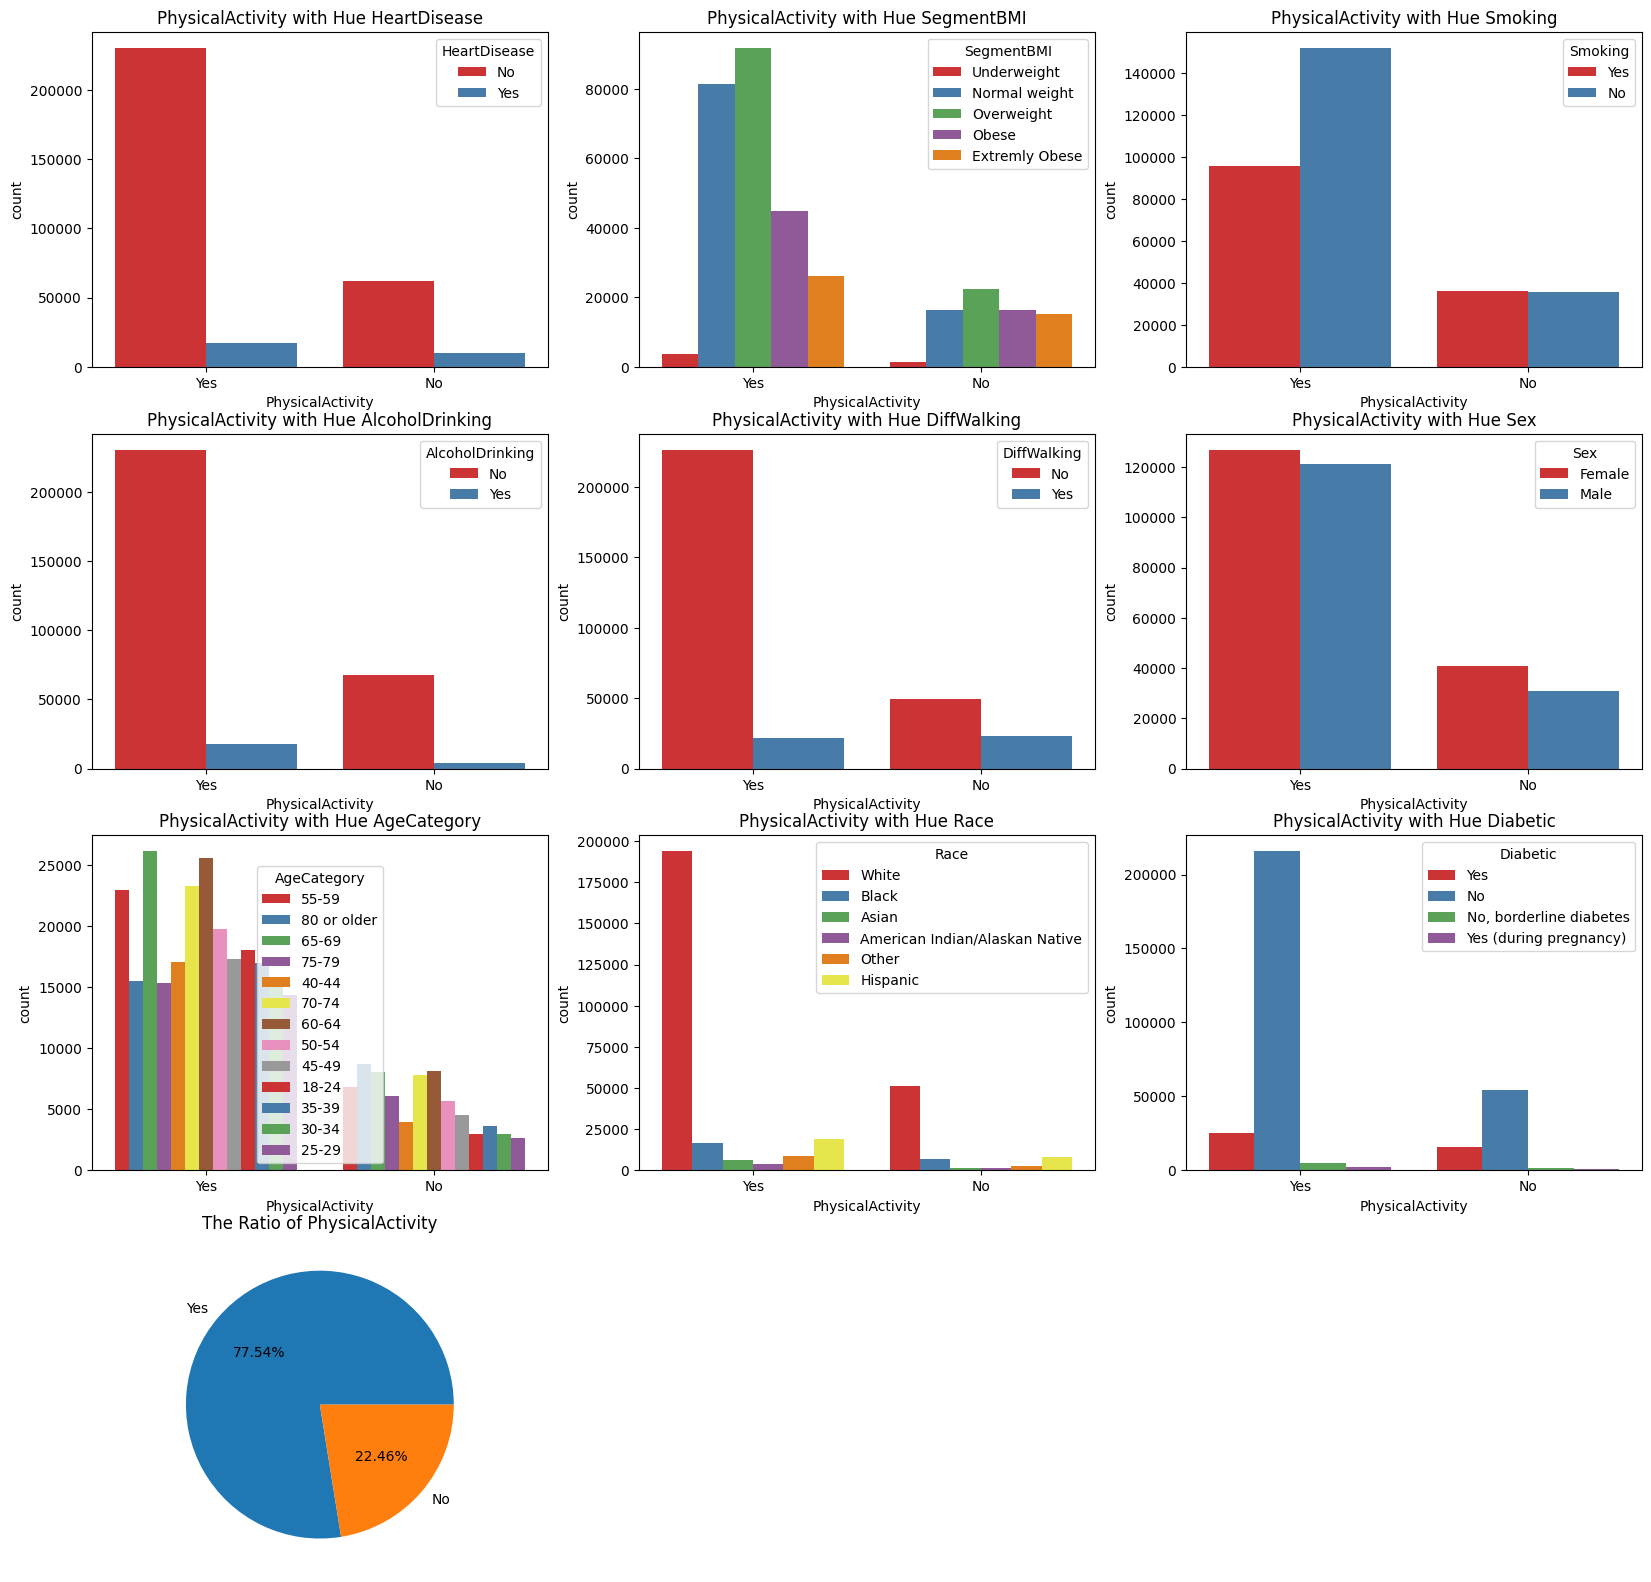

In [60]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.title('PhysicalActivity with Hue HeartDisease')
sns.countplot(x='PhysicalActivity',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(4,3,2)
plt.title('PhysicalActivity with Hue SegmentBMI')
sns.countplot(x='PhysicalActivity',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(4,3,3)
plt.title('PhysicalActivity with Hue Smoking')
sns.countplot(x='PhysicalActivity',hue='Smoking',data=data,palette='Set1')
plt.subplot(4,3,4)
plt.title('PhysicalActivity with Hue AlcoholDrinking')
sns.countplot(x='PhysicalActivity',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(4,3,5)
plt.title('PhysicalActivity with Hue DiffWalking')
sns.countplot(x='PhysicalActivity',hue='DiffWalking',data=data,palette='Set1')
plt.subplot(4,3,6)
plt.title('PhysicalActivity with Hue Sex')
sns.countplot(x='PhysicalActivity',hue='Sex',data=data,palette='Set1')
plt.subplot(4,3,7)
plt.title('PhysicalActivity with Hue AgeCategory')
sns.countplot(x='PhysicalActivity',hue='AgeCategory',data=data,palette='Set1')
plt.subplot(4,3,8)
plt.title('PhysicalActivity with Hue Race')
sns.countplot(x='PhysicalActivity',hue='Race',data=data,palette='Set1')
plt.subplot(4,3,9)
plt.title('PhysicalActivity with Hue Diabetic')
sns.countplot(x='PhysicalActivity',hue='Diabetic',data=data,palette='Set1')
plt.subplot(4,3,10)
plt.title('The Ratio of PhysicalActivity')
plt.pie(data['PhysicalActivity'].value_counts(),autopct='%1.2f%%',labels=data['PhysicalActivity'].value_counts().index)
plt.show()

In [61]:
#GenHealth
value,index=data['GenHealth'].value_counts().values,data['GenHealth'].value_counts().index
print("GenHealth Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

GenHealth Column's Count Values : 


Count
Very good  113858
Good        93129
Excellent   66842
Fair        34677
Poor        11289

In [62]:
value,index=(data.groupby(['HeartDisease','GenHealth'])['GenHealth'].count()).values,(data.groupby(['HeartDisease','GenHealth'])['GenHealth'].count()).index
print('HeartDisease With Regards GenHealth is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','GenHealth'])['GenHealth'].count()).values,(data.groupby(['SegmentBMI','GenHealth'])['GenHealth'].count()).index
print('-'*40,'\nSegmentBMI With Regards GenHealth is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','GenHealth'])['GenHealth'].count()).values,(data.groupby(['Smoking','GenHealth'])['GenHealth'].count()).index
print('-'*40,'\nSmoking With Regards GenHealth is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','GenHealth'])['GenHealth'].count()).values,(data.groupby(['AlcoholDrinking','GenHealth'])['GenHealth'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards GenHealth is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Stroke','GenHealth'])['GenHealth'].count()).values,(data.groupby(['Stroke','GenHealth'])['GenHealth'].count()).index
print('-'*40,'\nStroke With Regards GenHealth is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['DiffWalking','GenHealth'])['GenHealth'].count()).values,(data.groupby(['DiffWalking','GenHealth'])['GenHealth'].count()).index
print('-'*40,'\nDiffWalking With Regards PhysicalActivity is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Sex','GenHealth'])['GenHealth'].count()).values,(data.groupby(['Sex','GenHealth'])['GenHealth'].count()).index
print('-'*40,'\nDiffWalking With Regards GenHealth is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AgeCategory','GenHealth'])['GenHealth'].count()).values,(data.groupby(['AgeCategory','GenHealth'])['GenHealth'].count()).index
print('-'*40,'\nAgeCategory With GenHealth is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Race','GenHealth'])['GenHealth'].count()).values,(data.groupby(['Race','GenHealth'])['GenHealth'].count()).index
print('-'*40,'\nRace With GenHealth is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Diabetic','GenHealth'])['GenHealth'].count()).values,(data.groupby(['Diabetic','GenHealth'])['GenHealth'].count()).index
print('-'*40,'\nDiabetic With GenHealth is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['PhysicalActivity','GenHealth'])['GenHealth'].count()).values,(data.groupby(['PhysicalActivity','GenHealth'])['GenHealth'].count()).index
print('-'*40,'\nPhysicalActivity With GenHealth is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['GenHealth'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['GenHealth'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking  and AlcoholDrinking With Regards GenHealth is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards GenHealth is :

                         Count
HeartDisease GenHealth        
No           Excellent   65342
             Fair        27593
             Good        83571
             Poor         7439
             Very good  108477
Yes          Excellent    1500
             Fair         7084
             Good         9558
             Poor         3850
             Very good    5381
---------------------------------------- 
SegmentBMI With Regards GenHealth is :

                          Count
SegmentBMI     GenHealth       
Underweight    Excellent   1164
               Fair         661
               Good        1379
               Poor         440
               Very good   1470
Normal weight  Excellent  29408
               Fair        7551
               Good       22292
               Poor        2689
               Very good  35838
Overweight     Excellent  24867
               Fair       10236
               Good       31806
               Poor     

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

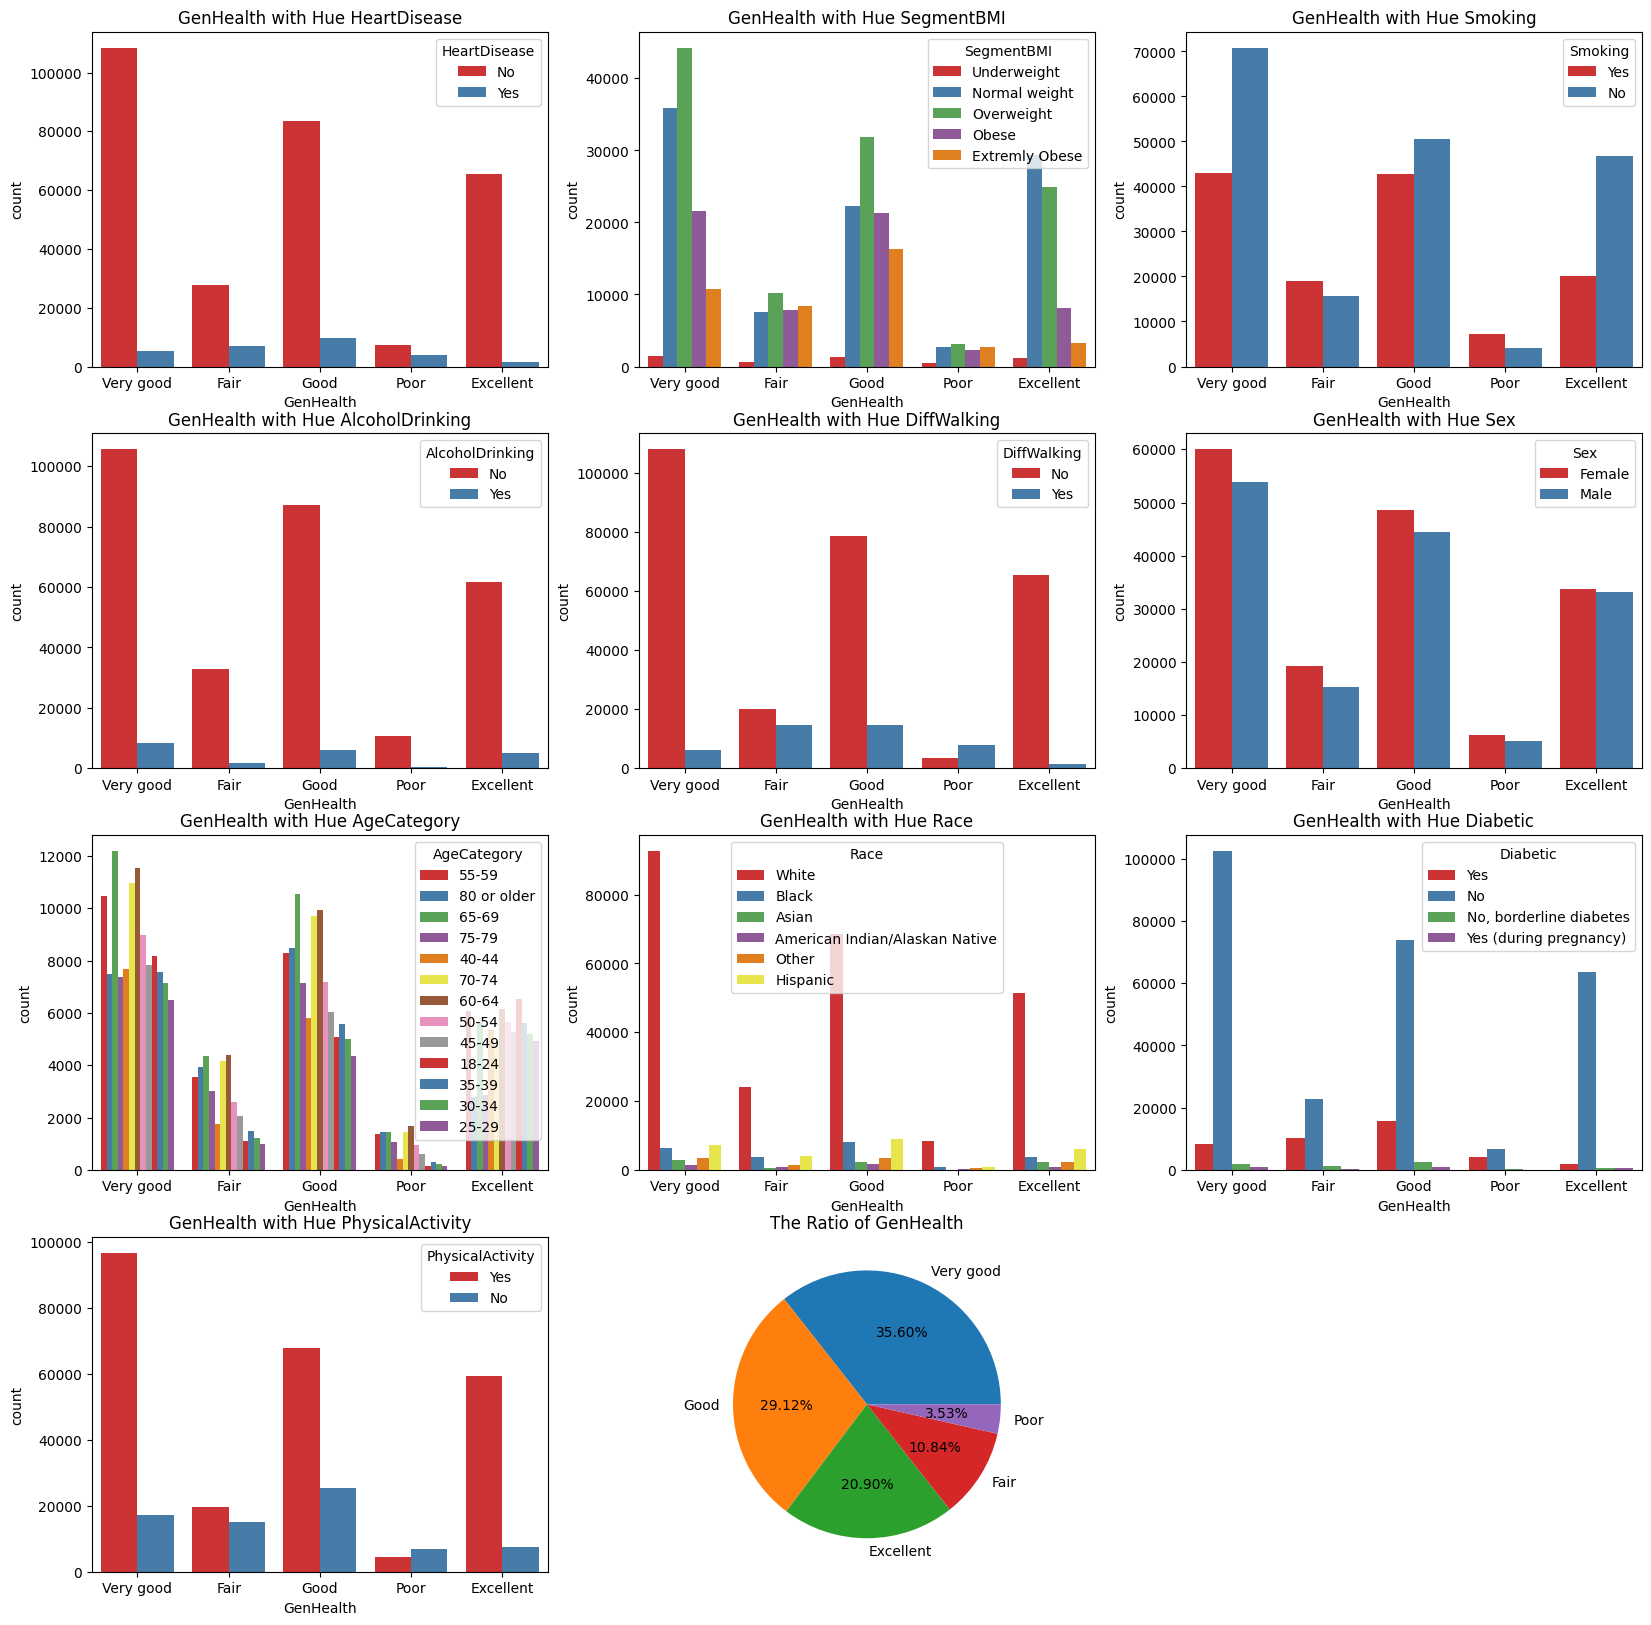

In [63]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.title('GenHealth with Hue HeartDisease')
sns.countplot(x='GenHealth',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(4,3,2)
plt.title('GenHealth with Hue SegmentBMI')
sns.countplot(x='GenHealth',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(4,3,3)
plt.title('GenHealth with Hue Smoking')
sns.countplot(x='GenHealth',hue='Smoking',data=data,palette='Set1')
plt.subplot(4,3,4)
plt.title('GenHealth with Hue AlcoholDrinking')
sns.countplot(x='GenHealth',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(4,3,5)
plt.title('GenHealth with Hue DiffWalking')
sns.countplot(x='GenHealth',hue='DiffWalking',data=data,palette='Set1')
plt.subplot(4,3,6)
plt.title('GenHealth with Hue Sex')
sns.countplot(x='GenHealth',hue='Sex',data=data,palette='Set1')
plt.subplot(4,3,7)
plt.title('GenHealth with Hue AgeCategory')
sns.countplot(x='GenHealth',hue='AgeCategory',data=data,palette='Set1')
plt.subplot(4,3,8)
plt.title('GenHealth with Hue Race')
sns.countplot(x='GenHealth',hue='Race',data=data,palette='Set1')
plt.subplot(4,3,9)
plt.title('GenHealth with Hue Diabetic')
sns.countplot(x='GenHealth',hue='Diabetic',data=data,palette='Set1')
plt.subplot(4,3,10)
plt.title('GenHealth with Hue PhysicalActivity')
sns.countplot(x='GenHealth',hue='PhysicalActivity',data=data,palette='Set1')
plt.subplot(4,3,11)
plt.title('The Ratio of GenHealth')
plt.pie(data['GenHealth'].value_counts(),autopct='%1.2f%%',labels=data['GenHealth'].value_counts().index)
plt.show()

In [64]:
#SleepTime
value,index=data['SleepTime'].value_counts().values,data['SleepTime'].value_counts().index
print("SleepTime Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

SleepTime Column's Count Values : 


Count
7.0   97751
8.0   97602
6.0   66721
5.0   19184
9.0   16041
10.0   7796
4.0    7750
12.0   2205
3.0    1992
2.0     788
1.0     551
11.0    415
14.0    243
16.0    236
15.0    189
18.0    102
13.0     97
20.0     64
24.0     30
17.0     21
22.0      9
19.0      3
23.0      3
21.0      2

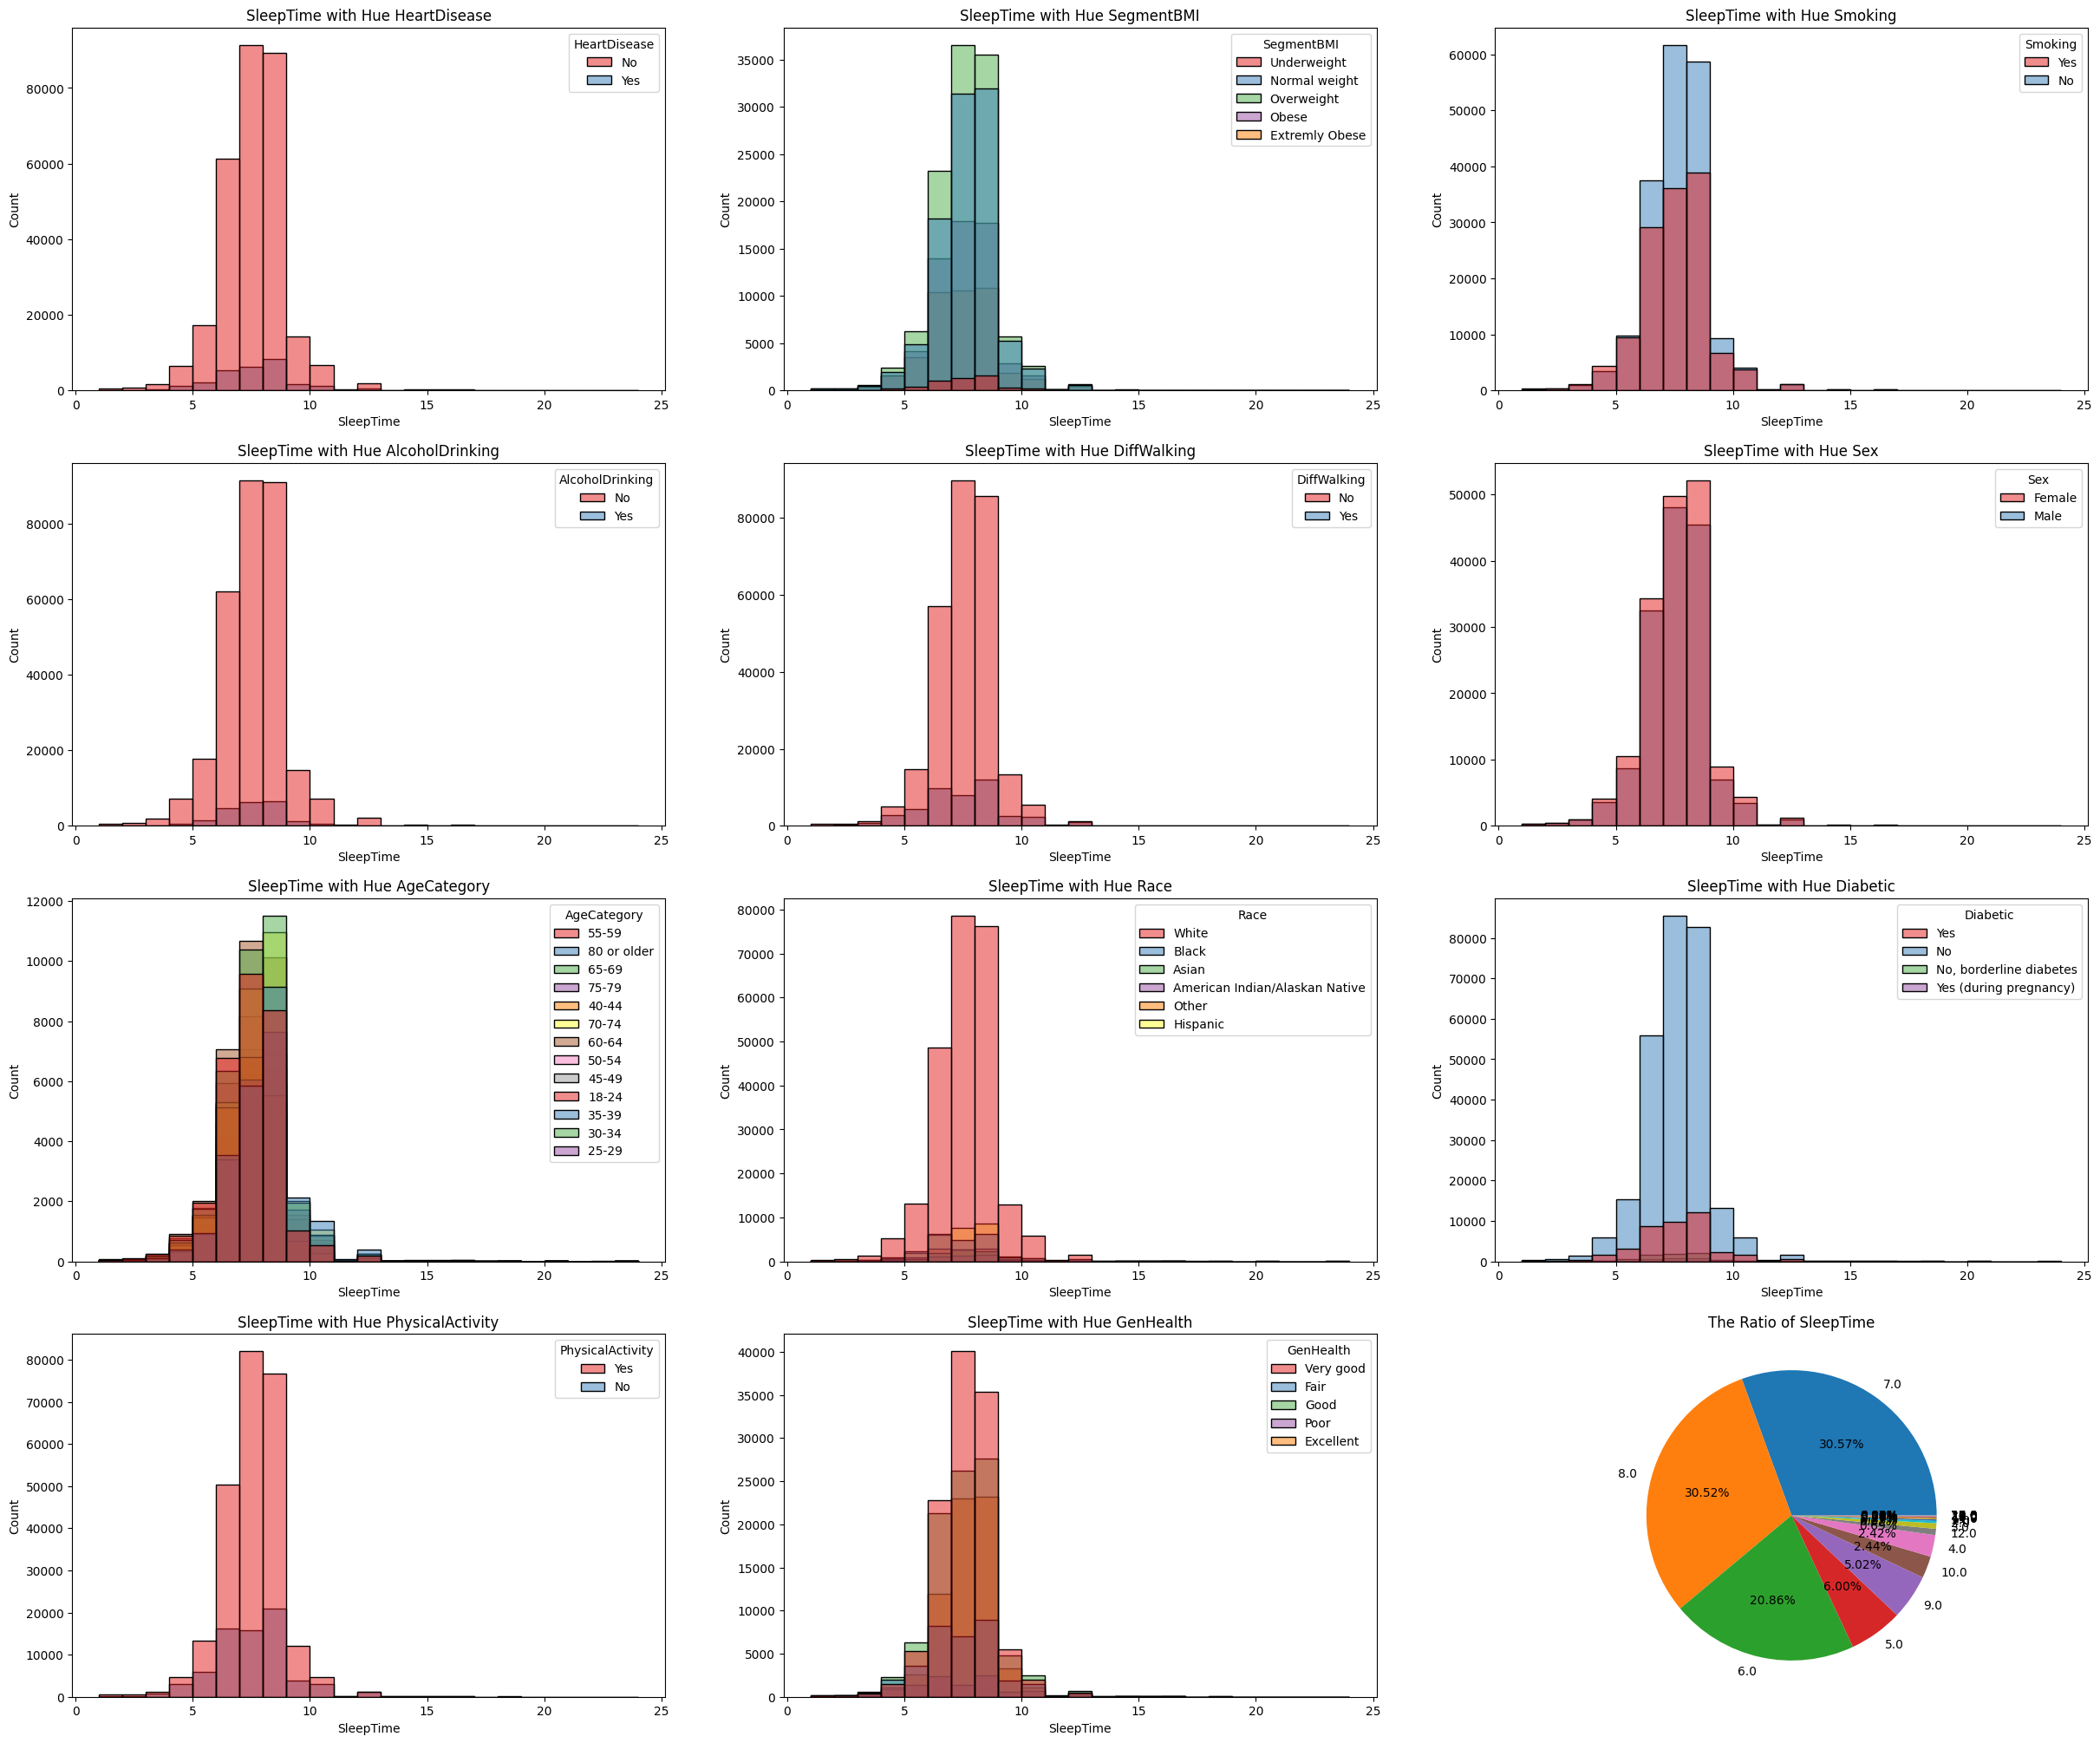

In [65]:
plt.figure(figsize=(30,25))
plt.subplot(4,3,1)
plt.title('SleepTime with Hue HeartDisease')
sns.histplot(x='SleepTime',hue='HeartDisease',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,2)
plt.title('SleepTime with Hue SegmentBMI')
sns.histplot(x='SleepTime',hue='SegmentBMI',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,3)
plt.title('SleepTime with Hue Smoking')
sns.histplot(x='SleepTime',hue='Smoking',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,4)
plt.title('SleepTime with Hue AlcoholDrinking')
sns.histplot(x='SleepTime',hue='AlcoholDrinking',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,5)
plt.title('SleepTime with Hue DiffWalking')
sns.histplot(x='SleepTime',hue='DiffWalking',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,6)
plt.title('SleepTime with Hue Sex')
sns.histplot(x='SleepTime',hue='Sex',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,7)
plt.title('SleepTime with Hue AgeCategory')
sns.histplot(x='SleepTime',hue='AgeCategory',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,8)
plt.title('SleepTime with Hue Race')
sns.histplot(x='SleepTime',hue='Race',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,9)
plt.title('SleepTime with Hue Diabetic')
sns.histplot(x='SleepTime',hue='Diabetic',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,10)
plt.title('SleepTime with Hue PhysicalActivity')
sns.histplot(x='SleepTime',hue='PhysicalActivity',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,11)
plt.title('SleepTime with Hue GenHealth')
sns.histplot(x='SleepTime',hue='GenHealth',data=data,palette='Set1',bins=np.sort(pd.unique(data['SleepTime'])))
plt.subplot(4,3,12)
plt.title('The Ratio of SleepTime')
plt.pie(data['SleepTime'].value_counts(),autopct='%1.2f%%',labels=data['SleepTime'].value_counts().index)
plt.show()

In [66]:
#Asthma
value,index=data['Asthma'].value_counts().values,data['Asthma'].value_counts().index
print("Asthma Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

Asthma Column's Count Values : 


Count
No   276923
Yes   42872

In [67]:
value,index=(data.groupby(['HeartDisease','Asthma'])['Asthma'].count()).values,(data.groupby(['HeartDisease','Asthma'])['Asthma'].count()).index
print('HeartDisease With Regards Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','Asthma'])['Asthma'].count()).values,(data.groupby(['SegmentBMI','Asthma'])['Asthma'].count()).index
print('-'*40,'\nSegmentBMI With Regards Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','Asthma'])['Asthma'].count()).values,(data.groupby(['Smoking','Asthma'])['Asthma'].count()).index
print('-'*40,'\nSmoking With Regards Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','Asthma'])['Asthma'].count()).values,(data.groupby(['AlcoholDrinking','Asthma'])['Asthma'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Stroke','Asthma'])['Asthma'].count()).values,(data.groupby(['Stroke','Asthma'])['Asthma'].count()).index
print('-'*40,'\nStroke With Regards Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['DiffWalking','Asthma'])['Asthma'].count()).values,(data.groupby(['DiffWalking','Asthma'])['Asthma'].count()).index
print('-'*40,'\nDiffWalking With Regards Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Sex','Asthma'])['Asthma'].count()).values,(data.groupby(['Sex','Asthma'])['Asthma'].count()).index
print('-'*40,'\nDiffWalking With Regards Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AgeCategory','Asthma'])['Asthma'].count()).values,(data.groupby(['AgeCategory','Asthma'])['Asthma'].count()).index
print('-'*40,'\nAgeCategory With Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Race','Asthma'])['Asthma'].count()).values,(data.groupby(['Race','Asthma'])['Asthma'].count()).index
print('-'*40,'\nRace With Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Diabetic','Asthma'])['Asthma'].count()).values,(data.groupby(['Diabetic','Asthma'])['Asthma'].count()).index
print('-'*40,'\nDiabetic With Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['PhysicalActivity','Asthma'])['Asthma'].count()).values,(data.groupby(['PhysicalActivity','Asthma'])['Asthma'].count()).index
print('-'*40,'\nPhysicalActivity With Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['GenHealth','Asthma'])['Asthma'].count()).values,(data.groupby(['GenHealth','Asthma'])['Asthma'].count()).index
print('-'*40,'\nGenHealth With Asthma is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['Asthma'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['Asthma'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking  and AlcoholDrinking With Regards Asthma is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards Asthma is :

                      Count
HeartDisease Asthma        
No           No      254483
             Yes      37939
Yes          No       22440
             Yes       4933
---------------------------------------- 
SegmentBMI With Regards Asthma is :

                        Count
SegmentBMI     Asthma        
Underweight    No        4428
               Yes        686
Normal weight  No       86790
               Yes      10988
Overweight     No      100786
               Yes      13569
Obese          No       52248
               Yes       8921
Extremly Obese No       32671
               Yes       8708
---------------------------------------- 
Smoking With Regards Asthma is :

                 Count
Smoking Asthma        
No      No      163994
        Yes      23893
Yes     No      112929
        Yes      18979
---------------------------------------- 
AlcoholDrinking With Regards Asthma is :

                         Count
AlcoholDrinking Asthma   

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

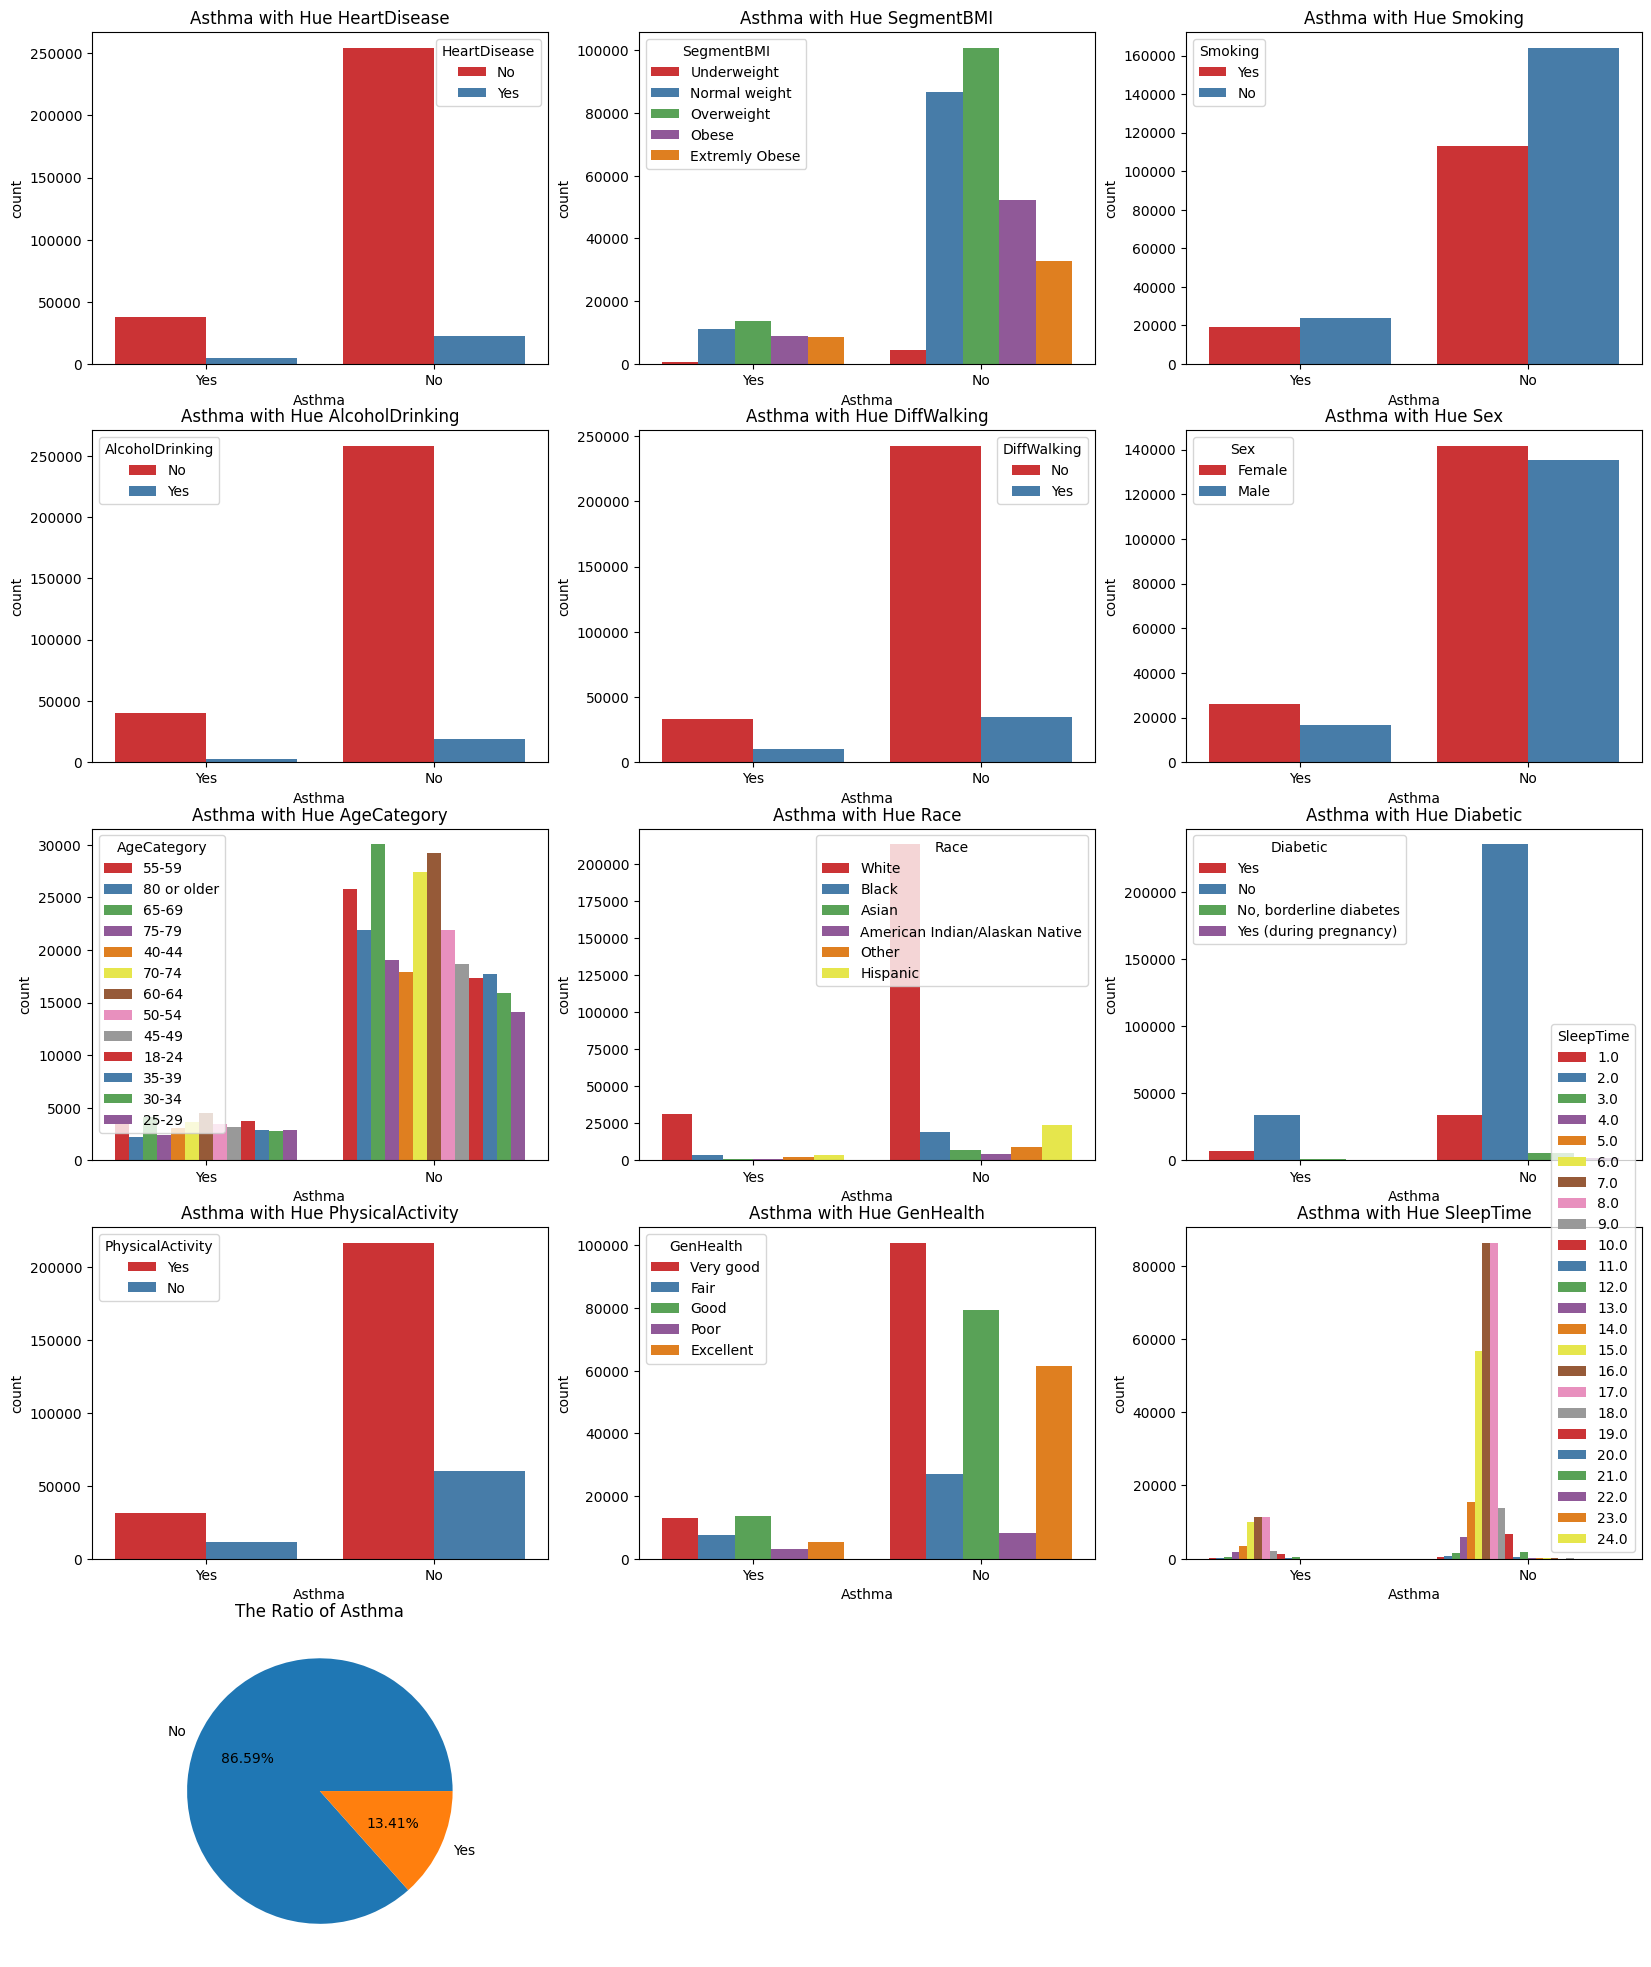

In [68]:
# Asthma 
plt.figure(figsize=(20,25))
plt.subplot(5,3,1)
plt.title('Asthma with Hue HeartDisease')
sns.countplot(x='Asthma',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(5,3,2)
plt.title('Asthma with Hue SegmentBMI')
sns.countplot(x='Asthma',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(5,3,3)
plt.title('Asthma with Hue Smoking')
sns.countplot(x='Asthma',hue='Smoking',data=data,palette='Set1')
plt.subplot(5,3,4)
plt.title('Asthma with Hue AlcoholDrinking')
sns.countplot(x='Asthma',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(5,3,5)
plt.title('Asthma with Hue DiffWalking')
sns.countplot(x='Asthma',hue='DiffWalking',data=data,palette='Set1')
plt.subplot(5,3,6)
plt.title('Asthma with Hue Sex')
sns.countplot(x='Asthma',hue='Sex',data=data,palette='Set1')
plt.subplot(5,3,7)
plt.title('Asthma with Hue AgeCategory')
sns.countplot(x='Asthma',hue='AgeCategory',data=data,palette='Set1')
plt.subplot(5,3,8)
plt.title('Asthma with Hue Race')
sns.countplot(x='Asthma',hue='Race',data=data,palette='Set1')
plt.subplot(5,3,9)
plt.title('Asthma with Hue Diabetic')
sns.countplot(x='Asthma',hue='Diabetic',data=data,palette='Set1')
plt.subplot(5,3,10)
plt.title('Asthma with Hue PhysicalActivity')
sns.countplot(x='Asthma',hue='PhysicalActivity',data=data,palette='Set1')
plt.subplot(5,3,11)
plt.title('Asthma with Hue GenHealth')
sns.countplot(x='Asthma',hue='GenHealth',data=data,palette='Set1')
plt.subplot(5,3,12)
plt.title('Asthma with Hue SleepTime')
sns.countplot(x='Asthma',hue='SleepTime',data=data,palette='Set1')
plt.subplot(5,3,13)
plt.title('The Ratio of Asthma')
plt.pie(data['Asthma'].value_counts(),autopct='%1.2f%%',labels=data['Asthma'].value_counts().index)
plt.show()

In [69]:
#KidneyDisease
value,index=data['KidneyDisease'].value_counts().values,data['KidneyDisease'].value_counts().index
print("KidneyDisease Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

KidneyDisease Column's Count Values : 


Count
No   308016
Yes   11779

In [70]:
value,index=(data.groupby(['HeartDisease','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['HeartDisease','KidneyDisease'])['KidneyDisease'].count()).index
print('HeartDisease With Regards KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['SegmentBMI','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nSegmentBMI With Regards KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['Smoking','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nSmoking With Regards KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['AlcoholDrinking','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Stroke','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['Stroke','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nStroke With Regards KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['DiffWalking','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['DiffWalking','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nDiffWalking With Regards KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nDiffWalking With Regards KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AgeCategory','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['AgeCategory','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nAgeCategory With KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Race','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['Race','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nRace With KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Diabetic','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['Diabetic','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nDiabetic With KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['PhysicalActivity','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['PhysicalActivity','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nPhysicalActivity With KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['GenHealth','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['GenHealth','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nGenHealth With KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Asthma','KidneyDisease'])['KidneyDisease'].count()).values,(data.groupby(['Asthma','KidneyDisease'])['KidneyDisease'].count()).index
print('-'*40,'\nAsthma With KidneyDisease is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['KidneyDisease'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['KidneyDisease'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking  and AlcoholDrinking With Regards KidneyDisease is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards KidneyDisease is :

                             Count
HeartDisease KidneyDisease        
No           No             284098
             Yes              8324
Yes          No              23918
             Yes              3455
---------------------------------------- 
SegmentBMI With Regards KidneyDisease is :

                               Count
SegmentBMI     KidneyDisease        
Underweight    No               4912
               Yes               202
Normal weight  No              95087
               Yes              2691
Overweight     No             110500
               Yes              3855
Obese          No              58497
               Yes              2672
Extremly Obese No              39020
               Yes              2359
---------------------------------------- 
Smoking With Regards KidneyDisease is :

                        Count
Smoking KidneyDisease        
No      No             182002
        Yes              5885
Yes     No 

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

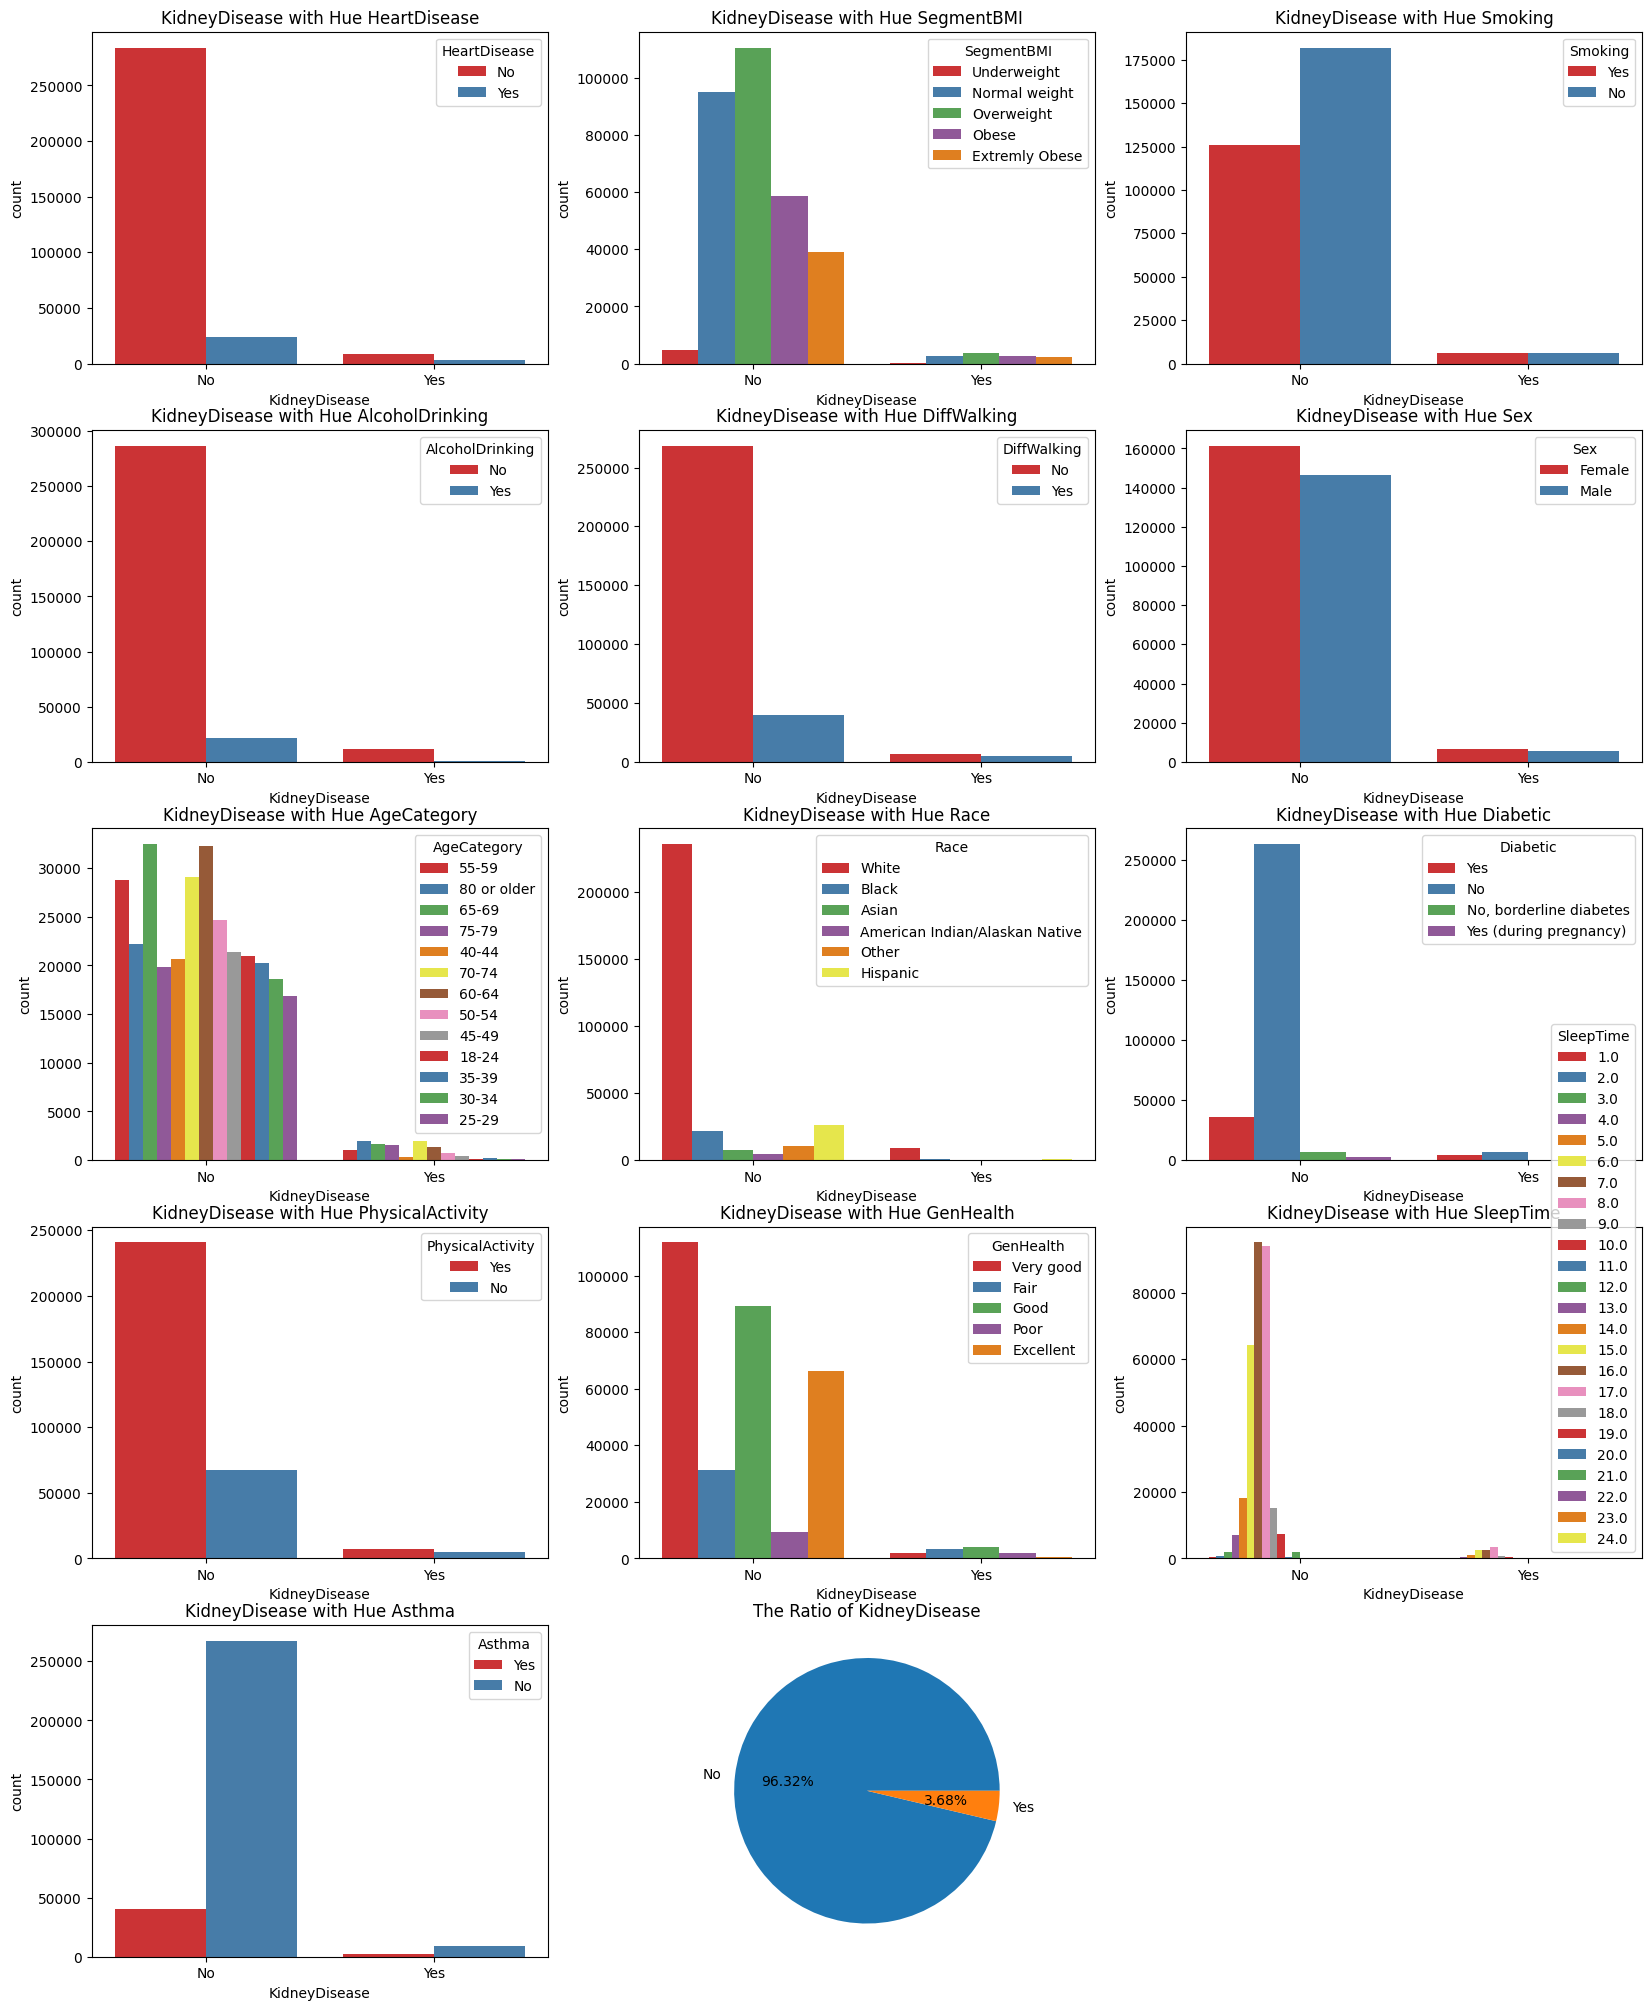

In [71]:
plt.figure(figsize=(20,25))
plt.subplot(5,3,1)
plt.title('KidneyDisease with Hue HeartDisease')
sns.countplot(x='KidneyDisease',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(5,3,2)
plt.title('KidneyDisease with Hue SegmentBMI')
sns.countplot(x='KidneyDisease',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(5,3,3)
plt.title('KidneyDisease with Hue Smoking')
sns.countplot(x='KidneyDisease',hue='Smoking',data=data,palette='Set1')
plt.subplot(5,3,4)
plt.title('KidneyDisease with Hue AlcoholDrinking')
sns.countplot(x='KidneyDisease',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(5,3,5)
plt.title('KidneyDisease with Hue DiffWalking')
sns.countplot(x='KidneyDisease',hue='DiffWalking',data=data,palette='Set1')
plt.subplot(5,3,6)
plt.title('KidneyDisease with Hue Sex')
sns.countplot(x='KidneyDisease',hue='Sex',data=data,palette='Set1')
plt.subplot(5,3,7)
plt.title('KidneyDisease with Hue AgeCategory')
sns.countplot(x='KidneyDisease',hue='AgeCategory',data=data,palette='Set1')
plt.subplot(5,3,8)
plt.title('KidneyDisease with Hue Race')
sns.countplot(x='KidneyDisease',hue='Race',data=data,palette='Set1')
plt.subplot(5,3,9)
plt.title('KidneyDisease with Hue Diabetic')
sns.countplot(x='KidneyDisease',hue='Diabetic',data=data,palette='Set1')
plt.subplot(5,3,10)
plt.title('KidneyDisease with Hue PhysicalActivity')
sns.countplot(x='KidneyDisease',hue='PhysicalActivity',data=data,palette='Set1')
plt.subplot(5,3,11)
plt.title('KidneyDisease with Hue GenHealth')
sns.countplot(x='KidneyDisease',hue='GenHealth',data=data,palette='Set1')
plt.subplot(5,3,12)
plt.title('KidneyDisease with Hue SleepTime')
sns.countplot(x='KidneyDisease',hue='SleepTime',data=data,palette='Set1')
plt.subplot(5,3,13)
plt.title('KidneyDisease with Hue Asthma')
sns.countplot(x='KidneyDisease',hue='Asthma',data=data,palette='Set1')
plt.subplot(5,3,14)
plt.title('The Ratio of KidneyDisease')
plt.pie(data['KidneyDisease'].value_counts(),autopct='%1.2f%%',labels=data['KidneyDisease'].value_counts().index)
plt.show()

In [72]:
#SkinCancer
value,index=data['SkinCancer'].value_counts().values,data['SkinCancer'].value_counts().index
print("SkinCancer Column's Count Values : ")
pd.DataFrame(value,index,columns=['Count'])

SkinCancer Column's Count Values : 


Count
No   289976
Yes   29819

In [73]:
value,index=(data.groupby(['HeartDisease','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['HeartDisease','SkinCancer'])['SkinCancer'].count()).index
print('HeartDisease With Regards SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['SegmentBMI','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['SegmentBMI','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nSegmentBMI With Regards SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Smoking','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['Smoking','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nSmoking With Regards SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AlcoholDrinking','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['AlcoholDrinking','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nAlcoholDrinking With Regards SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Stroke','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['Stroke','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nStroke With Regards SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['DiffWalking','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['DiffWalking','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nDiffWalking With Regards SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Sex','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['Sex','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nDiffWalking With Regards SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['AgeCategory','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['AgeCategory','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nAgeCategory With SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Race','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['Race','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nRace With SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Diabetic','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['Diabetic','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nDiabetic With SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['PhysicalActivity','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['PhysicalActivity','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nPhysicalActivity With SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['GenHealth','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['GenHealth','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nGenHealth With SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['Asthma','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['Asthma','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nAsthma With SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['KidneyDisease','SkinCancer'])['SkinCancer'].count()).values,(data.groupby(['KidneyDisease','SkinCancer'])['SkinCancer'].count()).index
print('-'*40,'\nKidneyDisease With SkinCancer is :\n')
print(pd.DataFrame(value,index,columns=['Count']))
value,index=(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['SkinCancer'].count()).values,(data.groupby(['HeartDisease','SegmentBMI','Smoking','AlcoholDrinking'])['SkinCancer'].count()).index
print('-'*40,'\nHeartDisease , SegmentBMI , Smoking  and AlcoholDrinking With Regards SkinCancer is :\n')
pd.DataFrame(value,index,columns=['Count'])

HeartDisease With Regards SkinCancer is :

                          Count
HeartDisease SkinCancer        
No           No          267583
             Yes          24839
Yes          No           22393
             Yes           4980
---------------------------------------- 
SegmentBMI With Regards SkinCancer is :

                            Count
SegmentBMI     SkinCancer        
Underweight    No            4621
               Yes            493
Normal weight  No           88251
               Yes           9527
Overweight     No          102782
               Yes          11573
Obese          No           55773
               Yes           5396
Extremly Obese No           38549
               Yes           2830
---------------------------------------- 
Smoking With Regards SkinCancer is :

                     Count
Smoking SkinCancer        
No      No          171923
        Yes          15964
Yes     No          118053
        Yes          13855
--------------------------------

Count
HeartDisease SegmentBMI     Smoking AlcoholDrinking       
No           Underweight    No      No                2583
                                    Yes                 97
                            Yes     No                1790
                                    Yes                243
             Normal weight  No      No               54313
                                    Yes               3030
                            Yes     No               29680
                                    Yes               4416
             Overweight     No      No               59252
                                    Yes               2940
                            Yes     No               37557
                                    Yes               4611
             Obese          No      No               31269
                                    Yes               1332
                            Yes     No               20332
                                    Yes               2104
             Extremly Obese No      No               21023
                                    Yes                712
                            Yes     No               13987
                                    Yes               1151
Yes          Underweight    No      No                 128
                                    Yes                  2
                            Yes     No                 250
                                    Yes                 21
             Normal weight  No      No                2488
                                    Yes                 46
                            Yes     No                3550
                                    Yes                255
             Overweight     No      No                4079
                                    Yes                110
                            Yes     No                5494
                                    Yes                312
             Obese          No      No                2483
                                    Yes                 52
                            Yes     No                3404
                                    Yes                193
             Extremly Obese No      No                1907
                                    Yes                 41
                            Yes     No                2449
                                    Yes                109

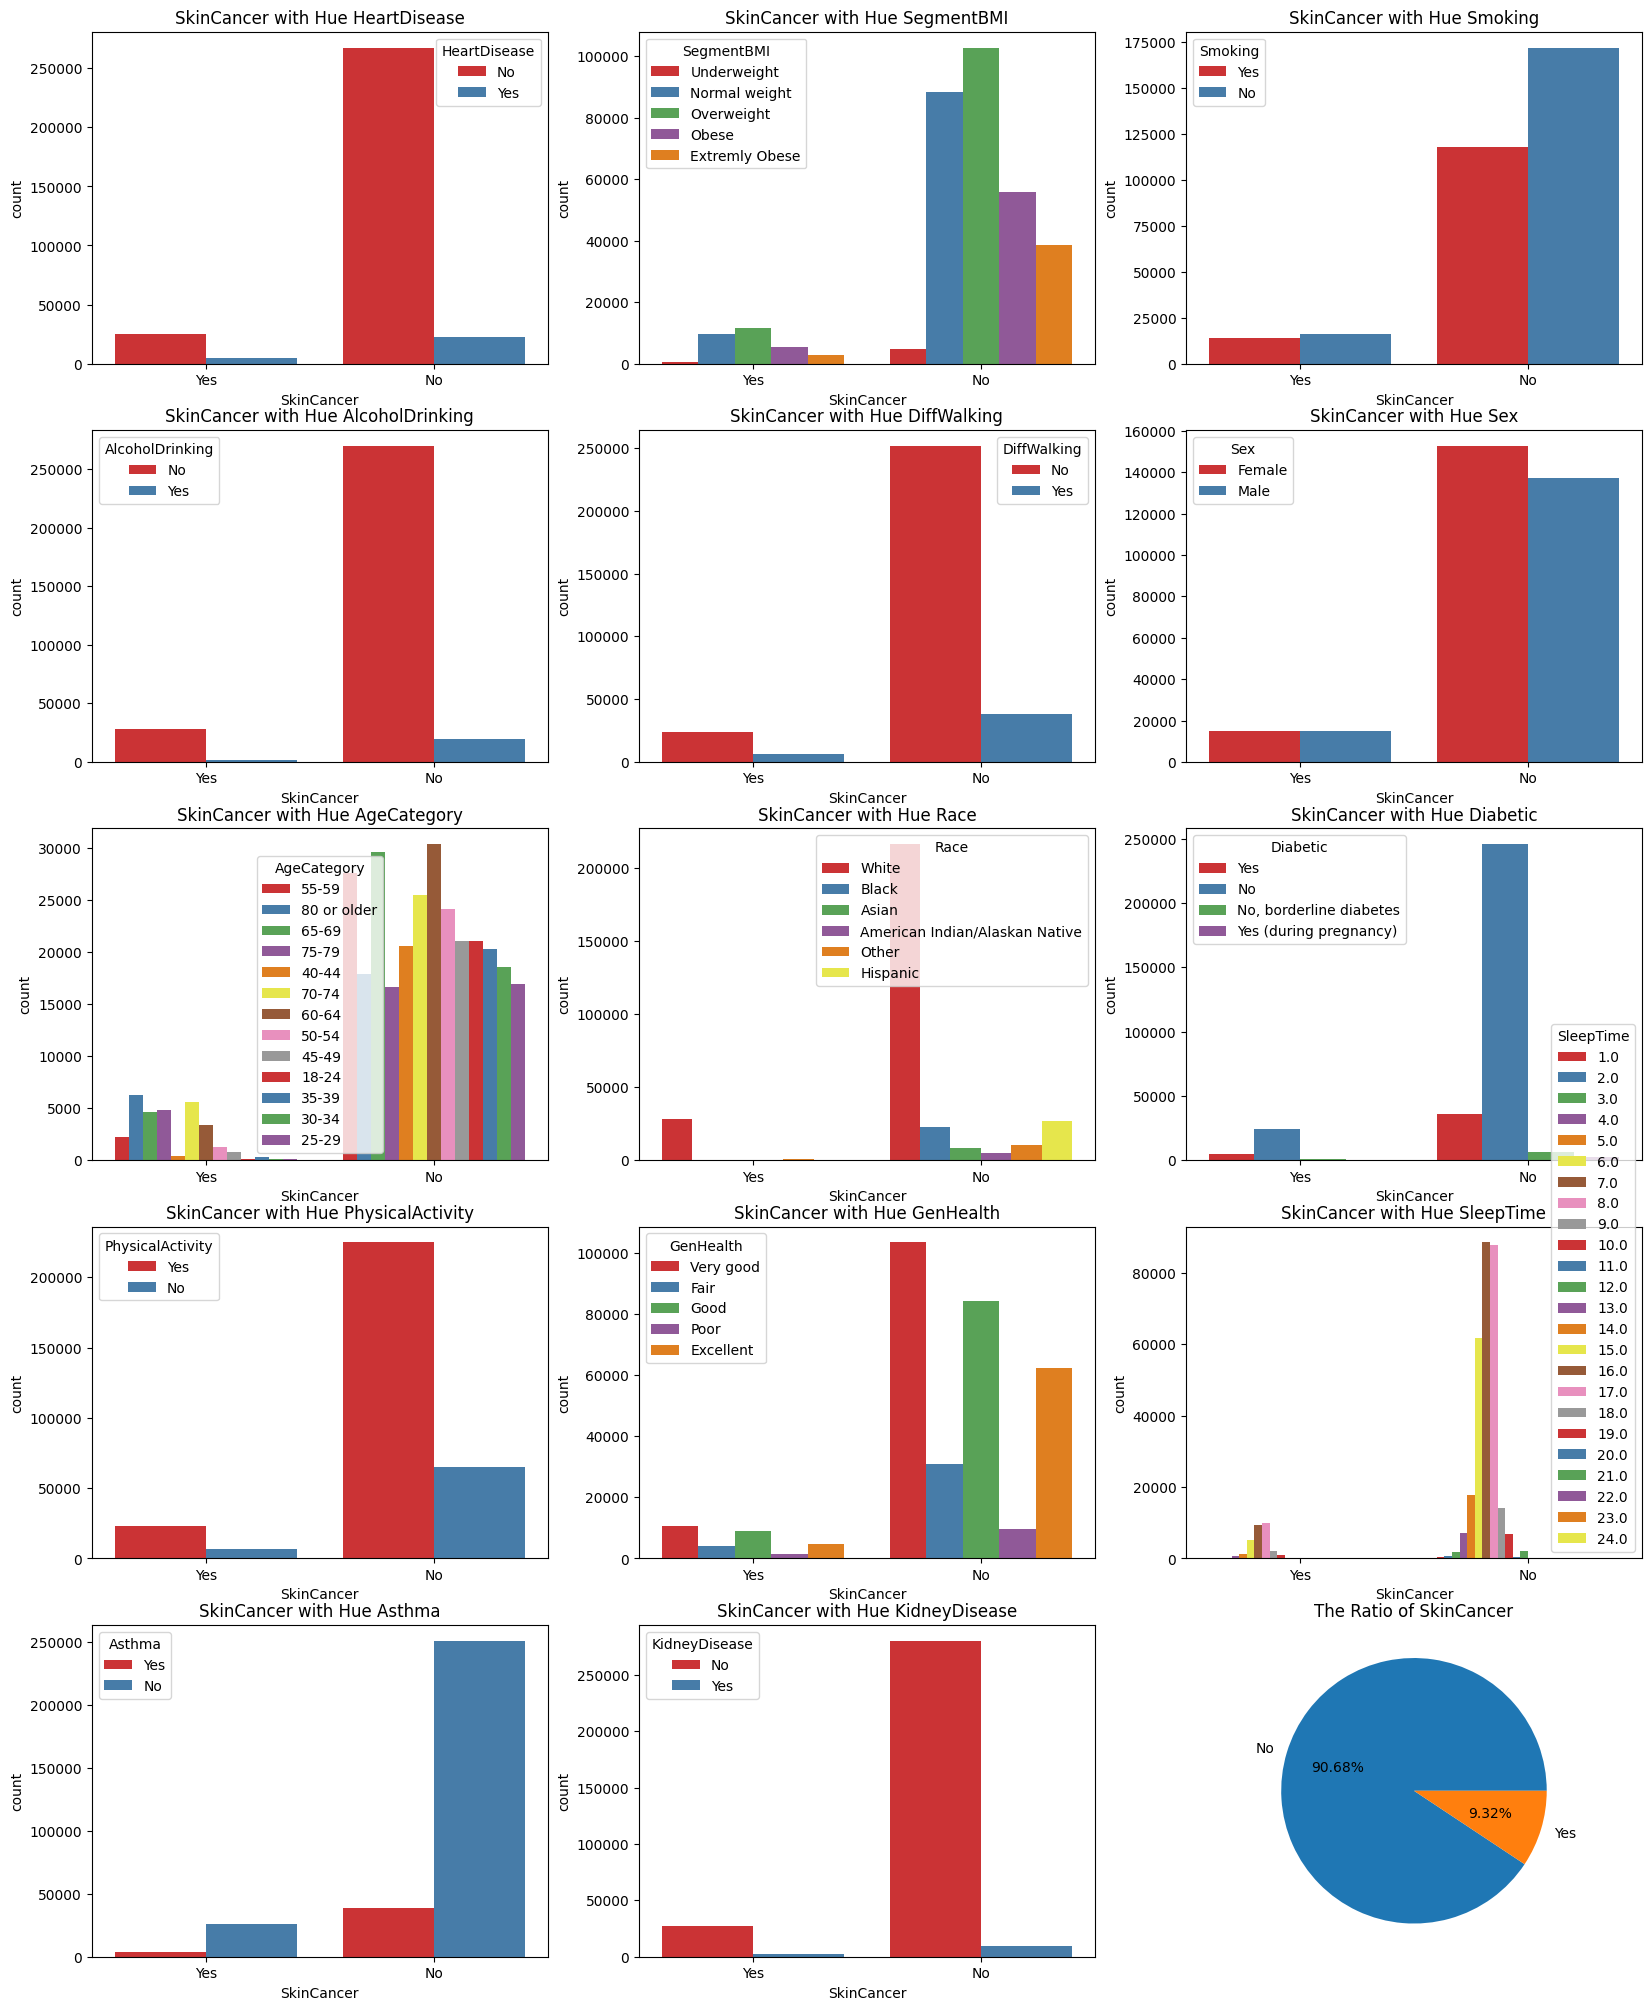

In [74]:
plt.figure(figsize=(20,25))
plt.subplot(5,3,1)
plt.title('SkinCancer with Hue HeartDisease')
sns.countplot(x='SkinCancer',hue='HeartDisease',data=data,palette='Set1')
plt.subplot(5,3,2)
plt.title('SkinCancer with Hue SegmentBMI')
sns.countplot(x='SkinCancer',hue='SegmentBMI',data=data,palette='Set1')
plt.subplot(5,3,3)
plt.title('SkinCancer with Hue Smoking')
sns.countplot(x='SkinCancer',hue='Smoking',data=data,palette='Set1')
plt.subplot(5,3,4)
plt.title('SkinCancer with Hue AlcoholDrinking')
sns.countplot(x='SkinCancer',hue='AlcoholDrinking',data=data,palette='Set1')
plt.subplot(5,3,5)
plt.title('SkinCancer with Hue DiffWalking')
sns.countplot(x='SkinCancer',hue='DiffWalking',data=data,palette='Set1')
plt.subplot(5,3,6)
plt.title('SkinCancer with Hue Sex')
sns.countplot(x='SkinCancer',hue='Sex',data=data,palette='Set1')
plt.subplot(5,3,7)
plt.title('SkinCancer with Hue AgeCategory')
sns.countplot(x='SkinCancer',hue='AgeCategory',data=data,palette='Set1')
plt.subplot(5,3,8)
plt.title('SkinCancer with Hue Race')
sns.countplot(x='SkinCancer',hue='Race',data=data,palette='Set1')
plt.subplot(5,3,9)
plt.title('SkinCancer with Hue Diabetic')
sns.countplot(x='SkinCancer',hue='Diabetic',data=data,palette='Set1')
plt.subplot(5,3,10)
plt.title('SkinCancer with Hue PhysicalActivity')
sns.countplot(x='SkinCancer',hue='PhysicalActivity',data=data,palette='Set1')
plt.subplot(5,3,11)
plt.title('SkinCancer with Hue GenHealth')
sns.countplot(x='SkinCancer',hue='GenHealth',data=data,palette='Set1')
plt.subplot(5,3,12)
plt.title('SkinCancer with Hue SleepTime')
sns.countplot(x='SkinCancer',hue='SleepTime',data=data,palette='Set1')
plt.subplot(5,3,13)
plt.title('SkinCancer with Hue Asthma')
sns.countplot(x='SkinCancer',hue='Asthma',data=data,palette='Set1')
plt.subplot(5,3,14)
plt.title('SkinCancer with Hue KidneyDisease')
sns.countplot(x='SkinCancer',hue='KidneyDisease',data=data,palette='Set1')
plt.subplot(5,3,15)
plt.title('The Ratio of SkinCancer')
plt.pie(data['SkinCancer'].value_counts(),autopct='%1.2f%%',labels=data['SkinCancer'].value_counts().index)
plt.show()

In [75]:
obj=data.select_dtypes(include=object).columns
pd.DataFrame(obj,columns=['Object Columns'])

Object Columns
0       HeartDisease
1            Smoking
2    AlcoholDrinking
3             Stroke
4        DiffWalking
5                Sex
6        AgeCategory
7               Race
8           Diabetic
9   PhysicalActivity
10         GenHealth
11            Asthma
12     KidneyDisease
13        SkinCancer

In [76]:
X=data.iloc[:,1:]
y=data.iloc[:,0]
key=X.keys()

In [77]:
X

Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
0          Yes              No     No             3.0          30.0   
1           No              No    Yes             0.0           0.0   
2          Yes              No     No            20.0          30.0   
3           No              No     No             0.0           0.0   
4           No              No     No            28.0           0.0   
...        ...             ...    ...             ...           ...   
319790     Yes              No     No             7.0           0.0   
319791     Yes              No     No             0.0           0.0   
319792      No              No     No             0.0           0.0   
319793      No              No     No             0.0           0.0   
319794      No              No     No             0.0           0.0   

       DiffWalking     Sex  AgeCategory      Race Diabetic PhysicalActivity  \
0               No  Female        55-59     White      Yes              Yes   
1               No  Female  80 or older     White       No              Yes   
2               No    Male        65-69     White      Yes              Yes   
3               No  Female        75-79     White       No               No   
4              Yes  Female        40-44     White       No              Yes   
...            ...     ...          ...       ...      ...              ...   
319790         Yes    Male        60-64  Hispanic      Yes               No   
319791          No    Male        35-39  Hispanic       No              Yes   
319792          No  Female        45-49  Hispanic       No              Yes   
319793          No  Female        25-29  Hispanic       No               No   
319794          No  Female  80 or older  Hispanic       No              Yes   

        GenHealth  SleepTime Asthma KidneyDisease SkinCancer      SegmentBMI  
0       Very good        5.0    Yes            No        Yes     Underweight  
1       Very good        7.0     No            No         No   Normal weight  
2            Fair        8.0    Yes            No         No      Overweight  
3            Good        6.0     No            No        Yes   Normal weight  
4       Very good        8.0     No            No         No   Normal weight  
...           ...        ...    ...           ...        ...             ...  
319790       Fair        6.0    Yes            No         No      Overweight  
319791  Very good        5.0    Yes            No         No      Overweight  
319792       Good        6.0     No            No         No   Normal weight  
319793       Good       12.0     No            No         No           Obese  
319794       Good        8.0     No            No         No  Extremly Obese  

[319795 rows x 17 columns]

In [78]:
y

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object

In [79]:
y.replace('Yes',1,inplace=True)
y.replace('No',0,inplace=True)
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [80]:
obj=list(obj)
obj.append('SegmentBMI')
X['SegmentBMI'].dtypes

CategoricalDtype(categories=['Underweight', 'Normal weight', 'Overweight', 'Obese',
                  'Extremly Obese'],
, ordered=True)

In [81]:
pd.DataFrame(obj,columns=['Object Columns'])

Object Columns
0       HeartDisease
1            Smoking
2    AlcoholDrinking
3             Stroke
4        DiffWalking
5                Sex
6        AgeCategory
7               Race
8           Diabetic
9   PhysicalActivity
10         GenHealth
11            Asthma
12     KidneyDisease
13        SkinCancer
14        SegmentBMI

In [82]:
label=LabelEncoder()
for col in obj:
    if col=='HeartDisease':
        continue
    X[col]=label.fit_transform(X[col])
X    

Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0             1                0       0             3.0          30.0   
1             0                0       1             0.0           0.0   
2             1                0       0            20.0          30.0   
3             0                0       0             0.0           0.0   
4             0                0       0            28.0           0.0   
...         ...              ...     ...             ...           ...   
319790        1                0       0             7.0           0.0   
319791        1                0       0             0.0           0.0   
319792        0                0       0             0.0           0.0   
319793        0                0       0             0.0           0.0   
319794        0                0       0             0.0           0.0   

        DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  \
0                 0    0            7     5         2                 1   
1                 0    0           12     5         0                 1   
2                 0    1            9     5         2                 1   
3                 0    0           11     5         0                 0   
4                 1    0            4     5         0                 1   
...             ...  ...          ...   ...       ...               ...   
319790            1    1            8     3         2                 0   
319791            0    1            3     3         0                 1   
319792            0    0            5     3         0                 1   
319793            0    0            1     3         0                 0   
319794            0    0           12     3         0                 1   

        GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  SegmentBMI  
0               4        5.0       1              0           1           4  
1               4        7.0       0              0           0           1  
2               1        8.0       1              0           0           3  
3               2        6.0       0              0           1           1  
4               4        8.0       0              0           0           1  
...           ...        ...     ...            ...         ...         ...  
319790          1        6.0       1              0           0           3  
319791          4        5.0       1              0           0           3  
319792          2        6.0       0              0           0           1  
319793          2       12.0       0              0           0           2  
319794          2        8.0       0              0           0           0  

[319795 rows x 17 columns]

In [83]:
data_transform=X
data_transform['output']=y
data_transform

Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0             1                0       0             3.0          30.0   
1             0                0       1             0.0           0.0   
2             1                0       0            20.0          30.0   
3             0                0       0             0.0           0.0   
4             0                0       0            28.0           0.0   
...         ...              ...     ...             ...           ...   
319790        1                0       0             7.0           0.0   
319791        1                0       0             0.0           0.0   
319792        0                0       0             0.0           0.0   
319793        0                0       0             0.0           0.0   
319794        0                0       0             0.0           0.0   

        DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  \
0                 0    0            7     5         2                 1   
1                 0    0           12     5         0                 1   
2                 0    1            9     5         2                 1   
3                 0    0           11     5         0                 0   
4                 1    0            4     5         0                 1   
...             ...  ...          ...   ...       ...               ...   
319790            1    1            8     3         2                 0   
319791            0    1            3     3         0                 1   
319792            0    0            5     3         0                 1   
319793            0    0            1     3         0                 0   
319794            0    0           12     3         0                 1   

        GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  SegmentBMI  \
0               4        5.0       1              0           1           4   
1               4        7.0       0              0           0           1   
2               1        8.0       1              0           0           3   
3               2        6.0       0              0           1           1   
4               4        8.0       0              0           0           1   
...           ...        ...     ...            ...         ...         ...   
319790          1        6.0       1              0           0           3   
319791          4        5.0       1              0           0           3   
319792          2        6.0       0              0           0           1   
319793          2       12.0       0              0           0           2   
319794          2        8.0       0              0           0           0   

        output  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
319790       1  
319791       0  
319792       0  
319793       0  
319794       0  

[319795 rows x 18 columns]

Smoking  AlcoholDrinking    Stroke  PhysicalHealth  \
Smoking           1.000000         0.111768  0.061226        0.115352   
AlcoholDrinking   0.111768         1.000000 -0.019858       -0.017254   
Stroke            0.061226        -0.019858  1.000000        0.137014   
PhysicalHealth    0.115352        -0.017254  0.137014        1.000000   
MentalHealth      0.085157         0.051282  0.046467        0.287987   
DiffWalking       0.120074        -0.035328  0.174143        0.428373   
Sex               0.085052         0.004200 -0.003091       -0.040904   
AgeCategory       0.128331        -0.059528  0.137822        0.110763   
Race              0.065499         0.036702 -0.003956       -0.000847   
Diabetic          0.053847        -0.057372  0.101518        0.151361   
PhysicalActivity -0.097174         0.017487 -0.079455       -0.232283   
GenHealth         0.020625         0.001629 -0.009335       -0.035703   
SleepTime        -0.030336        -0.005065  0.011900       -0.061387   
Asthma            0.024149        -0.002202  0.038866        0.117907   
KidneyDisease     0.034920        -0.028280  0.091167        0.142197   
SkinCancer        0.033977        -0.005702  0.048116        0.041700   
SegmentBMI        0.013652         0.008293  0.002065       -0.051750   
output            0.107764        -0.032080  0.196835        0.170721   

                  MentalHealth  DiffWalking       Sex  AgeCategory      Race  \
Smoking               0.085157     0.120074  0.085052     0.128331  0.065499   
AlcoholDrinking       0.051282    -0.035328  0.004200    -0.059528  0.036702   
Stroke                0.046467     0.174143 -0.003091     0.137822 -0.003956   
PhysicalHealth        0.287987     0.428373 -0.040904     0.110763 -0.000847   
MentalHealth          1.000000     0.152235 -0.100058    -0.155506 -0.014491   
DiffWalking           0.152235     1.000000 -0.068860     0.243263 -0.015831   
Sex                  -0.100058    -0.068860  1.000000    -0.067478  0.018855   
AgeCategory          -0.155506     0.243263 -0.067478     1.000000  0.163090   
Race                 -0.014491    -0.015831  0.018855     0.163090  1.000000   
Diabetic              0.032945     0.205502 -0.013456     0.193745 -0.052216   
PhysicalActivity     -0.095808    -0.278524  0.048247    -0.121687  0.056767   
GenHealth            -0.004412    -0.043552 -0.010283     0.044427  0.050344   
SleepTime            -0.119717    -0.022216 -0.015704     0.104953  0.035889   
Asthma                0.114008     0.103222 -0.069191    -0.058108 -0.017975   
KidneyDisease         0.037281     0.153064 -0.009084     0.123190  0.003709   
SkinCancer           -0.033412     0.064840  0.013434     0.263537  0.134780   
SegmentBMI           -0.059308    -0.078957  0.106659     0.064105  0.021090   
output                0.028591     0.201258  0.070040     0.233432  0.034854   

                  Diabetic  PhysicalActivity  GenHealth  SleepTime    Asthma  \
Smoking           0.053847         -0.097174   0.020625  -0.030336  0.024149   
AlcoholDrinking  -0.057372          0.017487   0.001629  -0.005065 -0.002202   
Stroke            0.101518         -0.079455  -0.009335   0.011900  0.038866   
PhysicalHealth    0.151361         -0.232283  -0.035703  -0.061387  0.117907   
MentalHealth      0.032945         -0.095808  -0.004412  -0.119717  0.114008   
DiffWalking       0.205502         -0.278524  -0.043552  -0.022216  0.103222   
Sex              -0.013456          0.048247  -0.010283  -0.015704 -0.069191   
AgeCategory       0.193745         -0.121687   0.044427   0.104953 -0.058108   
Race             -0.052216          0.056767   0.050344   0.035889 -0.017975   
Diabetic          1.000000         -0.133824  -0.010854   0.000449  0.049827   
PhysicalActivity -0.133824          1.000000   0.024418   0.003849 -0.041526   
GenHealth        -0.010854          0.024418   1.000000  -0.004163  0.007280   
SleepTime         0.000449          0.003849  -0.004163   1.000000 -0.

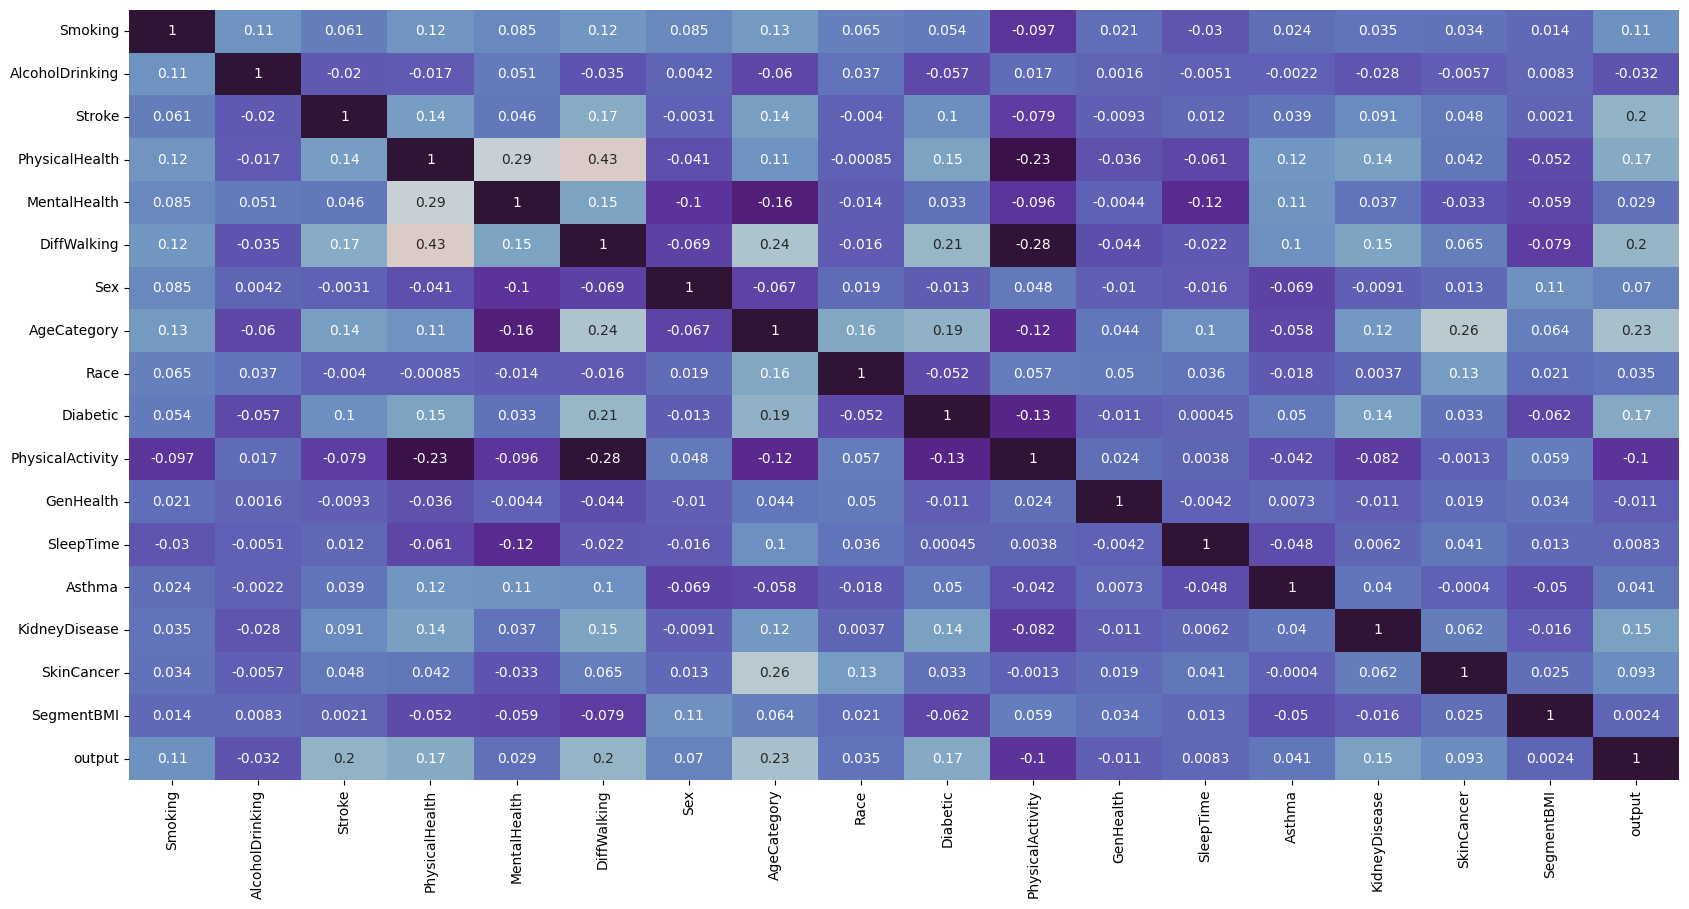

In [84]:
plt.figure(figsize=(20,10))
sns.heatmap(data_transform.corr(),annot=True,cbar=False,cmap='twilight_shifted')
data_transform.corr()

In [85]:
#2.GridSearchCV¶

RandomForestClassifierModel =RandomForestClassifier(n_estimators=100,max_depth=10, random_state=33)
SelectedParameters = {'max_depth':[5,10,15,20,25]}
GridSearchModel = GridSearchCV(RandomForestClassifierModel,SelectedParameters, cv = 2,return_train_score=True)
GridSearchModel.fit(X, y)
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

Best Score is : 1.0
Best Parameters are : {'max_depth': 5}
Best Estimator is : RandomForestClassifier(max_depth=5, random_state=33)


In [86]:
#3.Splitting Data¶

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=33, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (303805, 18)
X_test shape is  (15990, 18)
y_train shape is  (303805,)
y_test shape is  (15990,)


In [87]:
#Model Buliding¶
RandomForestClassifierModel = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=33)
RandomForestClassifierModel.fit(X_train, y_train)
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  1.0
RandomForestClassifierModel features importances are :  [1.64812456e-03 2.55392262e-05 1.76325335e-02 6.52603760e-03
 1.48405679e-04 1.78663362e-02 3.39098377e-03 3.01547741e-02
 9.17093757e-05 1.19248468e-02 3.79064994e-04 3.06997057e-03
 1.77446287e-04 1.57546065e-04 2.95188346e-03 1.32911196e-03
 1.97938338e-05 9.02505892e-01]


In [88]:
# Calculating Prediction¶
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [0 0 0 0 0 0 0 0 1 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.98855267 0.01144733]
 [0.93700614 0.06299386]
 [0.99401651 0.00598349]
 [0.99513281 0.00486719]
 [0.97398796 0.02601204]
 [0.99322318 0.00677682]
 [0.98502715 0.01497285]
 [0.99001401 0.00998599]
 [0.22642026 0.77357974]
 [0.97277192 0.02722808]]


array([[14602,     0],
       [    0,  1388]])

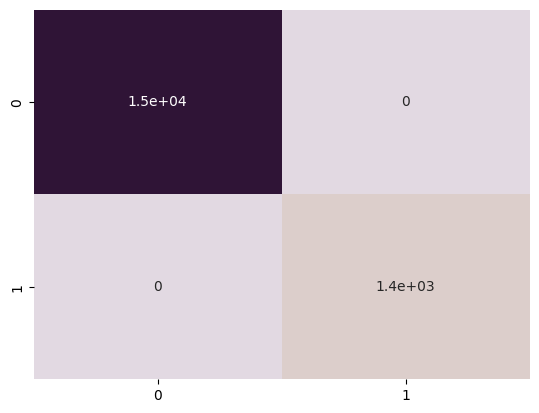

In [89]:
#Calculating Confusion Matrix¶
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,center = True,cbar=False,annot=True,cmap='twilight_shifted')
CM

In [90]:
#Calculating classification Report :¶
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     14602
           1       1.00      1.00      1.00      1388

    accuracy                           1.00     15990
   macro avg       1.00      1.00      1.00     15990
weighted avg       1.00      1.00      1.00     15990



In [91]:
#Data Scalling
from sklearn.preprocessing import StandardScaler

In [98]:
scalar = StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)
X_train.shape ,  X_test.shape

((303805, 18), (15990, 18))

In [95]:
# Linear _ Model

In [97]:
from sklearn.linear_model import LogisticRegression

In [100]:
lg = LogisticRegression(max_iter = 500)
lg.fit(X_train , y_train)

LogisticRegression(max_iter=500)

In [101]:
lg.score(X_train , y_train)

1.0

In [102]:
lg.score(X_test ,y_test)

1.0

In [103]:
lg.intercept_

array([-10.29681188])

In [104]:
lg.coef_

array([[ 9.93198873e-02, -3.12115627e-02,  1.06809364e-01,
         8.66512417e-02,  2.39547781e-02,  9.00772275e-02,
         1.31824196e-01,  3.57060643e-01,  2.01394874e-02,
         1.11406308e-01, -3.38795562e-02, -1.17367998e-02,
        -9.76091468e-03,  4.44725931e-02,  6.60988521e-02,
         3.84997228e-02,  5.06577755e-03,  5.94736998e+00]])

In [105]:
y_predict = lg.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_predict" : y_predict})
df

Y_test  Y_predict
168819       0          0
269360       0          0
226712       0          0
192181       0          0
32999        0          0
...        ...        ...
161013       0          0
309962       0          0
190594       0          0
188635       0          0
158708       0          0

[15990 rows x 2 columns]

<Axes: ylabel='count'>

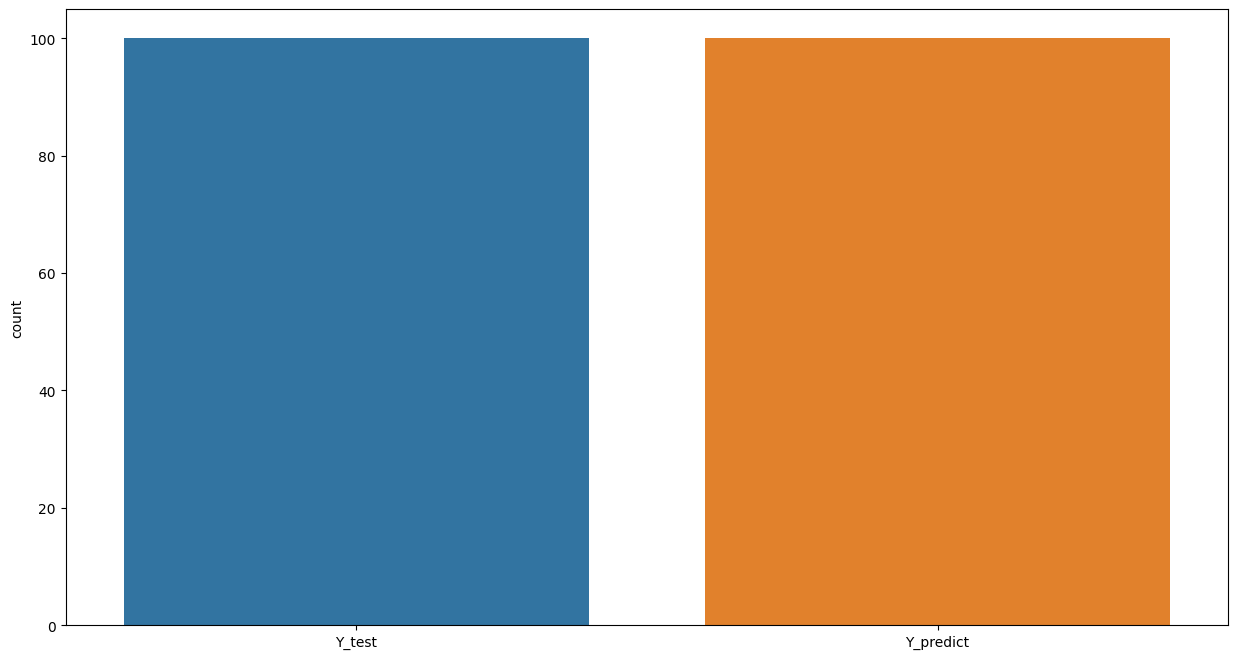

In [106]:
plt.figure(figsize=(15,8))
sns.countplot(df[:100])

In [107]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [109]:
knn.score(X_train , y_train )

0.9999934168298744

In [110]:
knn.score(X_test , y_test)

0.9999374609130707

In [111]:
y_predict = knn.predict(X_test)
df = pd.DataFrame({"Y_test" : y_test , "Y_predict" : y_predict})
df.head(10)

Y_test  Y_predict
168819       0          0
269360       0          0
226712       0          0
192181       0          0
32999        0          0
198169       0          0
211204       0          0
280016       0          0
198250       1          1
310633       0          0

In [ ]:
### Naive _Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)

GaussianNB()

In [114]:
gnb.score(X_train ,y_train)

1.0

In [115]:
gnb.score(X_test ,y_test)

1.0

In [116]:
y_predict= gnb.predict(X_test)
gnb = pd.DataFrame({"Y_test": y_test , "Y_predict" : y_predict})
gnb.head(10)

Y_test  Y_predict
168819       0          0
269360       0          0
226712       0          0
192181       0          0
32999        0          0
198169       0          0
211204       0          0
280016       0          0
198250       1          1
310633       0          0

In [ ]:
# DataSets 
#EnSemble

In [117]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [118]:
# Load the iris dataset
iris = load_iris()
X=iris.data
y=iris.target

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [120]:
model=RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [121]:
score=model.score(X_train,y_train)
print("train score: {}".format(score))

train score: 1.0


In [122]:
score=model.score(X_test,y_test)
print("train score: {}".format(score))

train score: 0.9


In [ ]:
### DecisionTreeClassifier

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
data_train = DecisionTreeClassifier(max_depth=4,max_features=7)

In [125]:
data_train.fit(X_train ,y_train)

DecisionTreeClassifier(max_depth=4, max_features=7)

In [126]:
data_train.score(X_train ,y_train)

1.0

In [127]:
data_train.score(X_test , y_test)

0.9

In [133]:
## Lasso
from sklearn.linear_model import Lasso

In [134]:
las = Lasso(alpha = 0.6)
las.fit(X_train , y_train)

Lasso(alpha=0.6)

In [135]:
print(las.score(X_train , y_train))


0.7413155330583614


In [136]:
print( las.score(X_test , y_test))

0.752972122139013


In [ ]:
# SVM

In [137]:
from sklearn import svm

In [138]:
regr = svm.SVR()

In [140]:
regr.fit(X_train,y_train)

SVR()

In [141]:
regr.score(X_train,y_train)

0.9560175754493961

In [142]:
regr.score(X_test , y_test)

0.8942937803234738

In [143]:
## Under _ Sampling

In [144]:
from imblearn.under_sampling import ClusterCentroids
undersampler = ClusterCentroids()


In [146]:
X_smote, y_smote = undersampler.fit_resample(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:178: ConvergenceWarning: Number of distinct clusters (49) found smaller than n_clusters (50). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


In [153]:
y_smote

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [155]:
X_smote

array([[5.1  , 3.5  , 1.4  , 0.2  ],
       [4.9  , 3.   , 1.4  , 0.2  ],
       [4.7  , 3.2  , 1.3  , 0.2  ],
       [4.6  , 3.1  , 1.5  , 0.2  ],
       [5.   , 3.6  , 1.4  , 0.2  ],
       [5.4  , 3.9  , 1.7  , 0.4  ],
       [4.6  , 3.4  , 1.4  , 0.3  ],
       [5.   , 3.4  , 1.5  , 0.2  ],
       [4.4  , 2.9  , 1.4  , 0.2  ],
       [4.9  , 3.1  , 1.5  , 0.1  ],
       [5.4  , 3.7  , 1.5  , 0.2  ],
       [4.8  , 3.4  , 1.6  , 0.2  ],
       [4.8  , 3.   , 1.4  , 0.1  ],
       [4.3  , 3.   , 1.1  , 0.1  ],
       [5.8  , 4.   , 1.2  , 0.2  ],
       [5.7  , 4.4  , 1.5  , 0.4  ],
       [5.4  , 3.9  , 1.3  , 0.4  ],
       [5.1  , 3.5  , 1.4  , 0.3  ],
       [5.7  , 3.8  , 1.7  , 0.3  ],
       [5.1  , 3.8  , 1.5  , 0.3  ],
       [5.4  , 3.4  , 1.7  , 0.2  ],
       [5.1  , 3.7  , 1.5  , 0.4  ],
       [4.6  , 3.6  , 1.   , 0.2  ],
       [5.1  , 3.3  , 1.7  , 0.5  ],
       [4.8  , 3.4  , 1.9  , 0.2  ],
       [5.   , 3.   , 1.6  , 0.2  ],
       [5.   , 3.4  , 1.6  , 0.4  ],
 